In [1]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

C:\Users\pengq\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Overview of Data 

In [2]:
df=pd.read_csv('houseprice.csv')
df.shape

(1460, 81)

In [3]:
df[['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']]

,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,1710,856,856,854
1,1262,1262,1262,0
2,1786,920,920,866
3,1717,756,961,756
4,2198,1145,1145,1053
5,1362,796,796,566
6,1694,1686,1694,0
7,2090,1107,1107,983
8,1774,952,1022,752
9,1077,991,1077,0


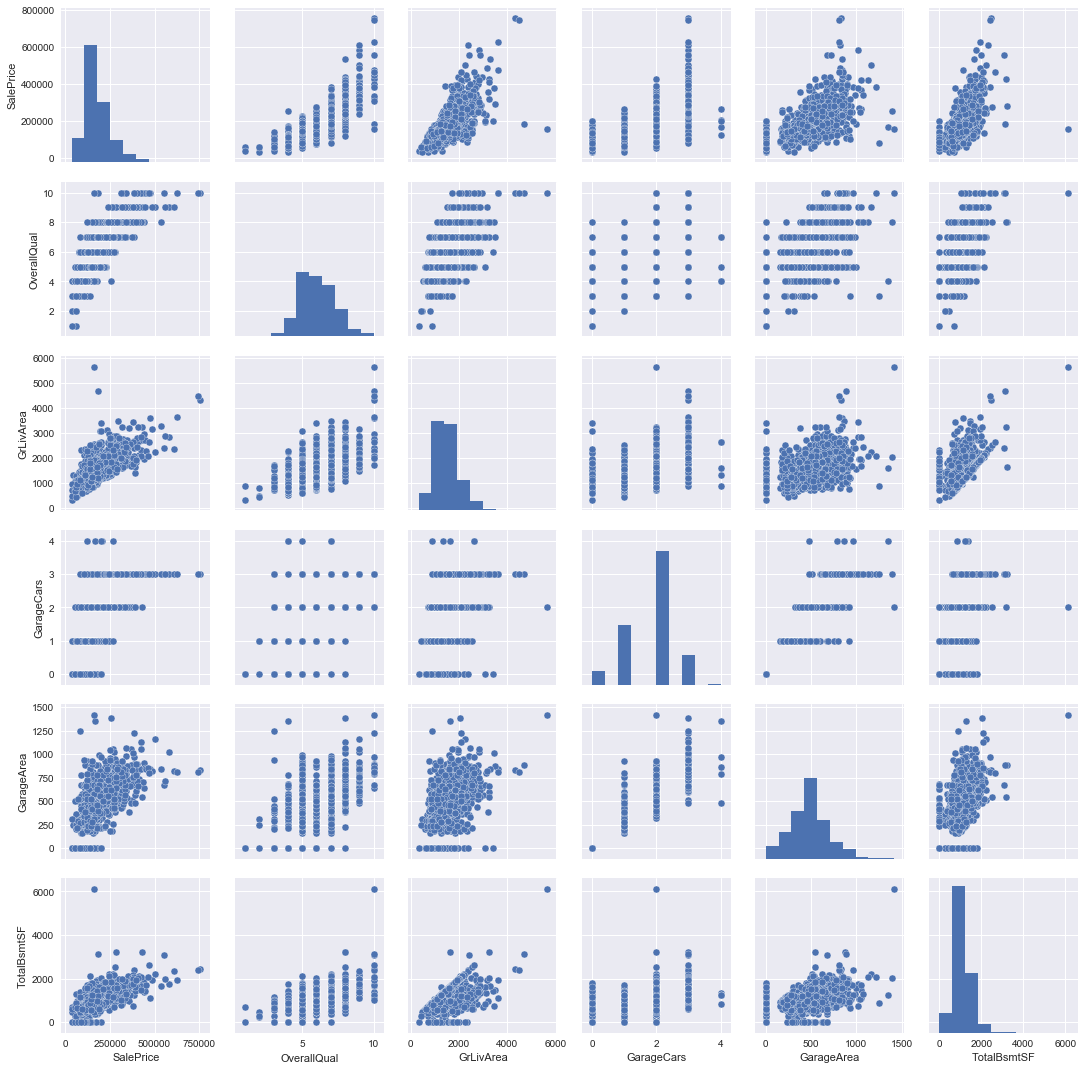

In [4]:
sns.pairplot(df[['SalePrice','OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']])
#plt.savefig('pariplot')

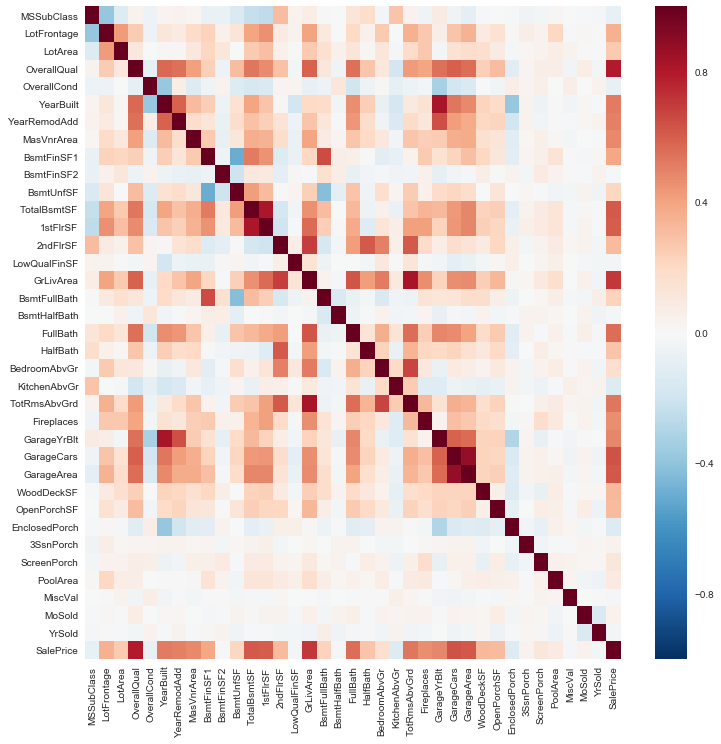

In [5]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(df.drop('Id', axis=1).corr())
plt.savefig('heatmap')

In [6]:
#df.info()
types={'float64', 'int64', 'object'}
for i in types:
    print ('The number of {} types: {}'.format(i, len(df.select_dtypes(i).columns)))

The number of int64 types: 35
The number of object types: 43
The number of float64 types: 3


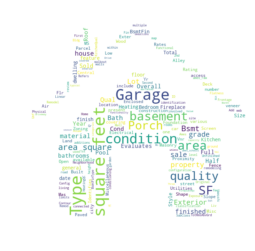

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate the wordcloud of columns
d = path.dirname('C:\\Users\\pengq\\AnacondaProjects\\houseprice\\')
text = open(path.join(d, 'names.txt')).read()
house_mask = np.array(Image.open(path.join(d, "house.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("said")
wc = WordCloud(background_color="white", max_words=2000, mask=house_mask,
               stopwords=stopwords)
wc.generate(text)
#wc.to_file(path.join(d, "house.png"))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
#plt.imshow(house_mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis("off")
plt.show()

# Cleaning Missing Values

[('Electrical', 0.0684931506849315), ('MasVnrType', 0.547945205479452), ('MasVnrArea', 0.547945205479452), ('BsmtQual', 2.5342465753424657), ('BsmtCond', 2.5342465753424657), ('BsmtFinType1', 2.5342465753424657), ('BsmtExposure', 2.6027397260273974), ('BsmtFinType2', 2.6027397260273974), ('GarageType', 5.5479452054794525), ('GarageYrBlt', 5.5479452054794525), ('GarageFinish', 5.5479452054794525), ('GarageQual', 5.5479452054794525), ('GarageCond', 5.5479452054794525), ('LotFrontage', 17.73972602739726), ('FireplaceQu', 47.26027397260274), ('Fence', 80.75342465753424), ('Alley', 93.76712328767123), ('MiscFeature', 96.30136986301369), ('PoolQC', 99.52054794520548)]


<module 'matplotlib.pyplot' from 'C:\\Users\\pengq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

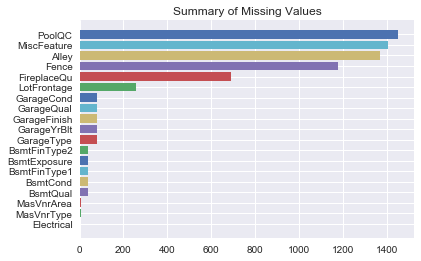

In [8]:
name=[]
missing=[]
names=[]
missings=[]
for index, item in df.iteritems():
    if sum(item.isnull())>0:
        name.append(item.name)
        missing.append(sum(item.isnull()))
missingval=sorted(zip(name, missing), key=lambda x: x[1],reverse=False)
for i in range(len(missingval)):
    names.append(missingval[i][0])
    missings.append(missingval[i][1])
for i in range(len(missingval)):
    plt.barh(names[i], missingval[i][1])
plt.title('Summary of Missing Values')
print([(missingval[i][0], missingval[i][1]/df.shape[0]*100) for i in range(len(missingval))])
plt

In [9]:
# after deleting the missing values and the zero columns 
print ('Objects: {}'.format(len(df.select_dtypes('object').columns)))
print ('Int64: {}'.format(len(df.select_dtypes('int64').columns)))
print ('Float64: {}'.format(len(df.select_dtypes('float64').columns)))

Objects: 43
Int64: 35
Float64: 3


In [10]:
df5=df
df5.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
# Show the first 3 variables that hvae the most missing values 
for i in ['PoolQC', 'MiscFeature', 'Alley']:
    print(df5[i].value_counts(normalize=True, dropna=False))

NaN    0.995205
Gd     0.002055
Ex     0.001370
Fa     0.001370
Name: PoolQC, dtype: float64
NaN     0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: MiscFeature, dtype: float64
NaN     0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64


In [16]:
# Dropping columns that have too many missing values
df5=df5.drop(['Id','PoolQC', 'MiscFeature', 'Alley'], axis=1)

# Exploring the most important variables

C:\Users\pengq\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


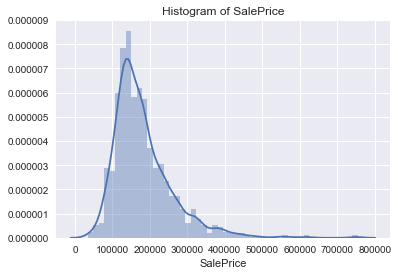

In [11]:
# Histogram of salesprice
sns.distplot(df5.SalePrice, bins=50)
plt.title('Histogram of SalePrice')
print(df5.SalePrice.describe())

               SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907


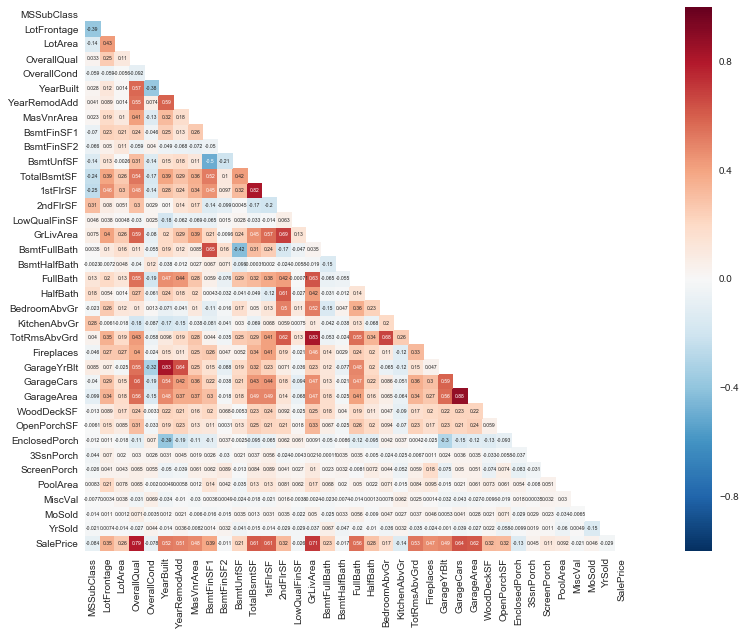

In [12]:
# Understand the correlation among numeric variables 
numlist=list(df5.select_dtypes(['int64', 'float64']).columns)
numlist.pop(0)
num=df5[numlist]
num.shape
fig=plt.figure(figsize=(20,10))
# Can be great to plot only a half matrix
mask = np.zeros_like(num.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    p2 = sns.heatmap(num.corr(), mask=mask, square=True,annot=True, annot_kws={'size':5})
#sns.heatmap(num.corr(), annot=True, annot_kws={'size':8})
print(pd.DataFrame(num.corr().SalePrice).sort_values(by='SalePrice', ascending=False))
plt.savefig('heatmap')

Variables that might have multicollinearity<br>
GarageArea and GarageCars: 0.83<br>
TotalRmsAbvGrd and GrLivArea: 0.82<br>
GarageYrBlt and YearBuilt: 0.83<br>
1stFlrSF and TotalBsmtSF: 0.83<br>

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Boxplot of Overall Quality')

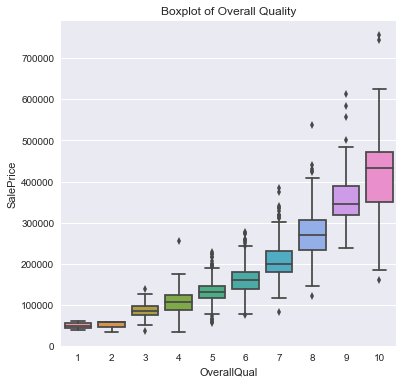

In [13]:
# Overallall Quality
fig=plt.figure(figsize=(6,6))
sns.boxplot(x=df5.OverallQual, y=df5.SalePrice)
plt.title('Boxplot of Overall Quality')
#Outliers are here with some very expensive houses

C:\Users\pengq\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 576x432 with 0 Axes>

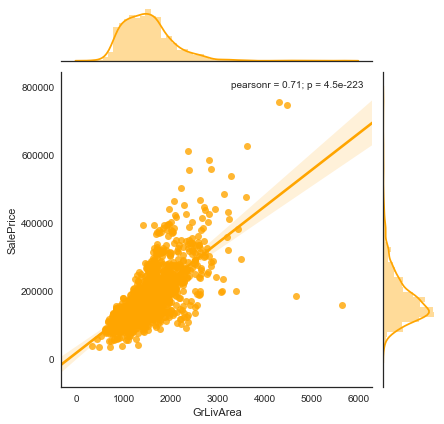

In [14]:
# Jointplot of GroundlivingArea and SalePrice
data=pd.DataFrame(np.column_stack([df5.GrLivArea, df5.SalePrice]), columns=['GrLivArea', 'SalePrice'])
fig=plt.figure(figsize=(8,6))
with sns.axes_style('white'):
    sns.jointplot("GrLivArea", "SalePrice", data, kind='reg', color='orange')
#plt.title('JointPlot of GrLivArea VS SalePrice')

# Encoding Categorical Variables

Fence: [Ordinal]<br>

GdPrv:    Good Privacy,
   MnPrv:    Minimum Privacy,
   GdWo: Good Wood,
   MnWw: Minimum Wood/Wire,
   NA:   No Fence

In [17]:
print('Categries: Fence', set(df5.Fence))
print(df5.Fence.value_counts(normalize=True, dropna=False))
m={None:0, 'MnPrv':2, 'GdPrv':4, 'GdWo':3, 'MnWw':1}
df5.Fence=df5.Fence.map(m)

Categries: Fence {nan, 'MnWw', 'GdPrv', 'GdWo', 'MnPrv'}
NaN      0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: Fence, dtype: float64


FirePlaceQu: [Ordinal]<br>

Ex:   Excellent - Exceptional Masonry Fireplace,
Gd:   Good - Masonry Fireplace in main level,
TA:   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement,
Fa:   Fair - Prefabricated Fireplace in basement,
Po:   Poor - Ben Franklin Stove,
NA:   FirePlaceQu has the same number of None as zeros in FirePlaces so NAs are imputed as zeros

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


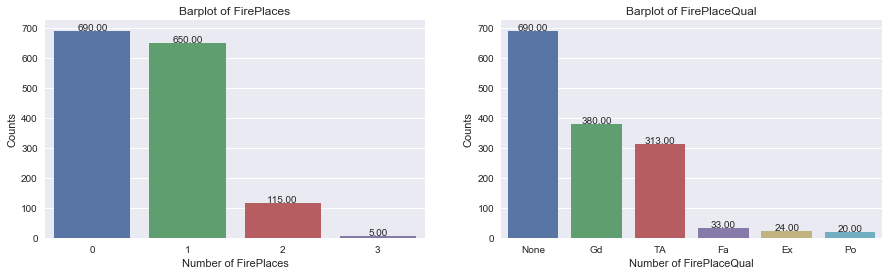

In [18]:
fig=plt.figure(figsize=(15,4))
a=df5.Fireplaces.value_counts(dropna=False)
b=df5.FireplaceQu.value_counts(dropna=False)
ax1=fig.add_subplot(121)
ax1=sns.barplot(a.index, a.values)
plt.title('Barplot of FirePlaces')
ax1.set_xlabel('Number of FirePlaces')
ax1.set_ylabel('Counts')
ax2=fig.add_subplot(122)
x=['None', 'Gd', 'TA', 'Fa', 'Ex', 'Po']
ax2=sns.barplot(x, b.values)
plt.title('Barplot of FirePlaceQual')
ax2.set_xlabel('Number of FirePlaceQual')
ax2.set_ylabel('Counts')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

In [19]:
print('Categries:FireplaceQu', set(df5.FireplaceQu))
print(df5.FireplaceQu.value_counts())
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.FireplaceQu=df5.FireplaceQu.map(m)

Categries:FireplaceQu {nan, 'Fa', 'Ex', 'Po', 'TA', 'Gd'}
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


# Lot Variables

LotFrontage: Linear feet of street connected to property [Numerical]

In [20]:
# Dropping columns that have too many missing values
from sklearn.preprocessing import LabelEncoder
df9=df.drop(['Id','PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu'], axis=1)
df9=df9.dropna(axis=0)
df9[df9.select_dtypes('object').columns]=df9[df9.select_dtypes('object').columns].apply(LabelEncoder().fit_transform)
df9.corr()['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.453035
LotArea          0.419714
TotalBsmtSF      0.407566
GrLivArea        0.397260
GarageArea       0.357030
TotRmsAbvGrd     0.354714
SalePrice        0.343978
GarageCars       0.285748
BedroomAbvGr     0.277136
Fireplaces       0.260293
OverallQual      0.241169
BsmtFinSF1       0.239734
PoolArea         0.211959
MasVnrArea       0.189769
FullBath         0.189692
RoofStyle        0.163997
OpenPorchSF      0.160862
BsmtFullBath     0.115151
BsmtUnfSF        0.111368
YearBuilt        0.107958
Foundation       0.104543
Exterior2nd      0.102270
RoofMatl         0.099004
Neighborhood     0.087416
YearRemodAdd     0.082938
WoodDeckSF       0.081338
PavedDrive       0.080518
LandSlope        0.080208
Exterior1st      0.076737
                   ...   
Condition2       0.023901
EnclosedPorch    0.016058
MoSold           0.014951
YrSold           0.013366
LowQualFinSF     0.010748
KitchenAbvGr     0.007411
MiscVal          0.000789
BsmtHalfBath

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

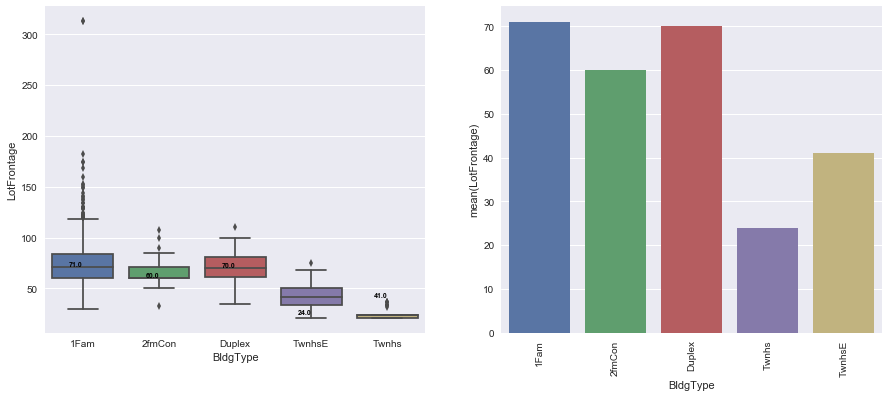

In [21]:
# BldgType has the strongest correlation with LotFrontage and it seems that different groups have different
# medians therefore I impute the missing values with the relative group median of LotFrontage
fig=plt.figure(figsize=(15, 6))
ax1=fig.add_subplot(121)
ax1=sns.boxplot(x='BldgType', y='LotFrontage', data=df5)
# Add texts of median onto boxplot
medians = df5.groupby(['BldgType'])['LotFrontage'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick,label in zip(pos,ax1.get_xticklabels()):
    ax1.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='right', size='x-small', color='black', weight='semibold')
ax2=fig.add_subplot(122)
ax2=sns.barplot(df5.groupby('BldgType')['LotFrontage'].median().index,df5.groupby('BldgType')['LotFrontage'].median())
plt.xticks(rotation=90)

In [22]:
# The variance of LotFrontage based on different BldgType is close to 1 
m={'1Fam':71, '2fmCon': 60, 'Duplex':70, 'Twnhs':24, 'TwnhsE':41}
from sklearn.preprocessing import StandardScaler
df9.LotFrontage=StandardScaler().fit_transform(df9.LotFrontage.reshape(-1,1))
print(df9.groupby('BldgType')['LotFrontage'].median().std())
print(df9.groupby('Neighborhood')['LotFrontage'].median().std())
print(df9.groupby('LotShape')['LotFrontage'].median().std())

0.896489858120436
0.8193969406203164
1.7237388219231757


C:\Users\pengq\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [23]:
df5.loc[df.LotFrontage.isnull(), 'LotFrontage'] = df5.groupby('BldgType').LotFrontage.transform('median')

LotShape: General Shape of the Property [Ordinal]
    
Reg:  Regular 
   IR1:  Slightly irregular
   IR2:  Moderately Irregular
   IR3:  Irregular

In [24]:
print('Categries:LotShape', set(df5.LotShape))
print(df5.LotShape.value_counts(dropna=False))
m={'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
df5.LotShape=df5.LotShape.map(m)

Categries:LotShape {'IR3', 'IR1', 'IR2', 'Reg'}
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


LotConfig: Lot Configuration [Categorical]
Encoding Method: Dummy Variables

Inside:   Inside lot,
   Corner:   Corner lot,
   CulDSac:  Cul-de-sac,
   FR2:  Frontage on 2 sides of property,
   FR3:  Frontage on 3 sides of property
   

In [25]:
print('Categries:LotConfig', set(df5.LotConfig))
print(df5.LotConfig.value_counts(normalize=True, dropna=False))
df5=pd.get_dummies(df5, prefix=['LotConfig'], columns=['LotConfig'])
#df5.head()

Categries:LotConfig {'FR2', 'CulDSac', 'Corner', 'FR3', 'Inside'}
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


# Garage Variables

In [26]:
for i in df5.columns[df5.columns.str.contains('Garage')]:
    print (i, df5[i].isnull().sum())

GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81


GarageYrBlt: the year that garage was built, the missing values are imputed using the corresponding YearBuilt

In [27]:
df5.GarageYrBlt.fillna(df5.YearBuilt, inplace=True)

GarageType:<br> All the categories are not ordinal therefore these will be One Hot Encoded later 
   2Types:   More than one type of garage
   Attchd:   Attached to home
   Basment:  Basement Garage
   BuiltIn:  Built-In (Garage part of house - typically has room above garage)
   CarPort:  Car Port
   Detchd:   Detached from home
   NA:   No Garage

In [28]:
df5.loc[df5.GarageType.isnull(), 'GarageType']='None'
print('Categries:GarageType', set(df5.GarageType))
print(df5.GarageType.value_counts(normalize=False, dropna=False))
df5=pd.get_dummies(df5, prefix=['GarageType'], columns=['GarageType'])
print(df5.shape)
#df5.head()

Categries:GarageType {'CarPort', 'Detchd', 'Basment', 'BuiltIn', '2Types', 'Attchd', 'None'}
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
(1460, 87)


GarageFinish: Interior finish of the garage [Ordinal]

Fin:Finished, RFn: Rough Finished, Unf:Unfinished, NA:No Garage  

In [29]:
df5.loc[df5.GarageFinish.isnull(), 'GarageFinish']='None'
print('Categries:GarageFinish', set(df5.GarageFinish))
print(df5.GarageFinish.value_counts(normalize=False, dropna=False))
m={'None':0, 'Unf':1, 'RFn':2, 'Fin':3}
df5.GarageFinish=df5.GarageFinish.map(m)

Categries:GarageFinish {'Fin', 'Unf', 'RFn', 'None'}
Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64


In [30]:
df5.apply(lambda x: sum(x.isnull()), axis=0).sort_values(ascending=False)

GarageCond            81
GarageQual            81
BsmtFinType2          38
BsmtExposure          38
BsmtFinType1          37
BsmtQual              37
BsmtCond              37
MasVnrArea             8
MasVnrType             8
Electrical             1
BsmtFinSF2             0
BsmtFinSF1             0
2ndFlrSF               0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
Foundation             0
ExterCond              0
HeatingQC              0
CentralAir             0
ExterQual              0
GarageType_None        0
Exterior2nd            0
Exterior1st            0
Neighborhood           0
MSZoning               0
LotFrontage            0
LotArea                0
Street                 0
LotShape               0
                      ..
LotConfig_FR2          0
LotConfig_FR3          0
LotConfig_Inside       0
GarageType_2Types      0
GarageType_Attchd      0
GarageType_Basment     0
GarageType_BuiltIn     0
GarageType_CarPort     0
ScreenPorch            0


GarageQual: Garage Quality [Ordinal]<br>
Ex:   Excellent,
   Gd:   Good,
   TA:   Typical/Average,
   Fa:   Fair,
   Po:   Poor,
   NA:   No Garage

In [31]:
print('Categries:GarageQual', set(df5.GarageQual))
print(df5.GarageQual.value_counts(normalize=True, dropna=False))
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.GarageQual=df5.GarageQual.map(m)

Categries:GarageQual {nan, 'Fa', 'Ex', 'Po', 'TA', 'Gd'}
TA     0.897945
NaN    0.055479
Fa     0.032877
Gd     0.009589
Po     0.002055
Ex     0.002055
Name: GarageQual, dtype: float64


GarageCond: GarageCondition [Ordinal]<br>
Ex:   Excellent,
   Gd:   Good,
   TA:   Typical/Average,
   Fa:   Fair,
   Po:   Poor,
   NA:   No Garage

In [32]:
print('Categries:GarageCondition', set(df5.GarageCond))
print(df5.GarageCond.value_counts(normalize=True, dropna=False))
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.GarageCond=df5.GarageCond.map(m)

Categries:GarageCondition {nan, 'Fa', 'Ex', 'Po', 'TA', 'Gd'}
TA     0.908219
NaN    0.055479
Fa     0.023973
Gd     0.006164
Po     0.004795
Ex     0.001370
Name: GarageCond, dtype: float64


# Masonry Variables

In [33]:
print('Missing values:')
print('MasVnrType:', df5.MasVnrType.isnull().sum(), 'MasVnrArea:', df5.MasVnrArea.isnull().sum())

Missing values:
MasVnrType: 8 MasVnrArea: 8


Masonry Veneer type: [Ordinal]<br>

There is a price difference between BrickFace, Brick Common, and Stone which is the mose expensive<br>
BrkCmn:   Brick Common,
   BrkFace:  Brick Face,
   None: None,
   Stone:    Stone

In [34]:
print('Categories:', set(df5.MasVnrType))
print(df5.MasVnrType.value_counts(normalize=True, dropna=False))
m={None:0, 'None':0, 'BrkCmn':1, 'BrkFace':2, 'Stone':3}
df5.MasVnrType=df5.MasVnrType.map(m)

Categories: {nan, 'Stone', 'BrkFace', 'BrkCmn', 'None'}
None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
NaN        0.005479
Name: MasVnrType, dtype: float64


MasVnrArea: Total Area of the Masonry veneer area [Numerical]<br>
Imput the missing value with 0

In [35]:
df5.MasVnrArea.fillna(0, inplace=True)

# Basement Variables 

In [36]:
# Summary of Missing Values in Basement Variables
for i in df5.columns[df5.columns.str.contains('Bsmt')]:
    print (i, df5[i].isnull().sum())

BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
BsmtFullBath 0
BsmtHalfBath 0


BsmtQual: Quality of the basement measured based on the height of the basement [Ordinal]<br>

   Ex:   Excellent (100+ inches),
   Gd:   Good (90-99 inches),
   TA:   Typical (80-89 inches),
   Fa:   Fair (70-79 inches),
   Po:   Poor (<70 inches),
   NA:   No Basement

In [37]:
print('Categories of BsmtQual:', set(df5.BsmtQual))
print(df5.BsmtQual.value_counts(normalize=True, dropna=False))
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.BsmtQual=df5.BsmtQual.map(m)

Categories of BsmtQual: {nan, 'Fa', 'Ex', 'TA', 'Gd'}
TA     0.444521
Gd     0.423288
Ex     0.082877
NaN    0.025342
Fa     0.023973
Name: BsmtQual, dtype: float64


BsmtCond: General condition of the basement [Ordinal]<br>

   Ex:   Excellent,
   Gd:   Good,
   TA:   Typical - slight dampness allowed,
   Fa:   Fair - dampness or some cracking or settling,
   Po:   Poor - Severe cracking, settling, or wetness,
   NA:   No Basement

In [38]:
print('Categories of BsmtCond:', set(df5.BsmtCond))
print(df5.BsmtCond.value_counts(normalize=True, dropna=False))
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.BsmtCond=df5.BsmtCond.map(m)

Categories of BsmtCond: {nan, 'Fa', 'Po', 'TA', 'Gd'}
TA     0.897945
Gd     0.044521
Fa     0.030822
NaN    0.025342
Po     0.001370
Name: BsmtCond, dtype: float64


BmstExposure: Refers to walkout or garden level walls [Ordinal]<br>
Gd:   Good Exposure,
Av:   Average Exposure (split levels or foyers typically score average or above),  
Mn:   Mimimum Exposure,
No:   No Exposure,
NA:   No Basement,

In [39]:
print('Categories of BsmtExposure:', set(df5.BsmtExposure))
print(df5.BsmtExposure.value_counts(normalize=True, dropna=False))
m={None:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
df5.BsmtExposure=df5.BsmtExposure.map(m)

Categories of BsmtExposure: {nan, 'No', 'Gd', 'Av', 'Mn'}
No     0.652740
Av     0.151370
Gd     0.091781
Mn     0.078082
NaN    0.026027
Name: BsmtExposure, dtype: float64


BsmtFinType1: Rating of basement finished area [Ordinal]

   GLQ:  Good Living Quarters,
   ALQ:  Average Living Quarters,
   BLQ:  Below Average Living Quarters,   
   Rec:  Average Rec Room,
   LwQ:  Low Quality,
   Unf:  Unfinshed,
   NA:   No Basement
   
BsmtFinType2: Rating of basement finished area with the same categories as BsmtFinType1 [Ordinal]

In [40]:
print('Categories of BsmtFinType1:', set(df5.BsmtFinType1))
print(df5.BsmtFinType1.value_counts(normalize=True, dropna=False))
m={None:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
df5.BsmtFinType1=df5.BsmtFinType1.map(m)

Categories of BsmtFinType1: {nan, 'LwQ', 'BLQ', 'GLQ', 'Unf', 'Rec', 'ALQ'}
Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
NaN    0.025342
Name: BsmtFinType1, dtype: float64


In [41]:
print('Categories of BsmtFinType2:', set(df5.BsmtFinType2))
print(df5.BsmtFinType2.value_counts(normalize=True, dropna=False))
m={None:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
df5.BsmtFinType2=df5.BsmtFinType2.map(m)

Categories of BsmtFinType2: {nan, 'LwQ', 'BLQ', 'Unf', 'GLQ', 'Rec', 'ALQ'}
Unf    0.860274
Rec    0.036986
LwQ    0.031507
NaN    0.026027
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64


# MSZoning Variable

MSZoning: [Categorical]<br> Encoding Method: OneHotEncoder

   C:   Commercial,
   FV:   Floating Village Residential,
   RH:   Residential High Density,
   RL:   Residential Low Density,
   RM:   Residential Medium Density

In [42]:
df5.MSZoning.value_counts(normalize=True, dropna=False)
df5=pd.get_dummies(df5, prefix=['MSZoning'], columns=['MSZoning'])
print(df5.shape)
df5.head()

(1460, 91)


,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,Pave,3,Lvl,AllPub,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,0,0,1,0
1,20,80.0,9600,Pave,3,Lvl,AllPub,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,0,0,1,0
2,60,68.0,11250,Pave,2,Lvl,AllPub,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,0,0,1,0
3,70,60.0,9550,Pave,2,Lvl,AllPub,Gtl,Crawfor,Norm,...,0,0,0,1,0,0,0,0,1,0
4,60,84.0,14260,Pave,2,Lvl,AllPub,Gtl,NoRidge,Norm,...,0,0,0,0,0,0,0,0,1,0


# Kitchen Variable

KitchenQual:[Ordinal]

Ex:   Excellent,
   Gd:   Good,
   TA:   Typical/Average,
   Fa:   Fair,
   Po:   Poor

In [43]:
print('Categories of KitchenQual:', set(df5.KitchenQual))
print(df5.KitchenQual.value_counts(normalize=True, dropna=False))
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.KitchenQual=df5.KitchenQual.map(m)

Categories of KitchenQual: {'Ex', 'Gd', 'Fa', 'TA'}
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: KitchenQual, dtype: float64


# Utilities Variable

Utilities: [Ordinal] 
Encoding Method: The categories are ranked in the order of the number of addional utilities, however as NoSeWa only have one house, I drop this row<br>
AllPub:   All public Utilities (E,G,W,& S),    
   NoSewr:   Electricity, Gas, and Water (Septic Tank),
   NoSeWa:   Electricity and Gas Only,
   ELO:  Electricity only

In [44]:
print('Categories of Utilities:', set(df5.Utilities))
print(df5.Utilities.value_counts(normalize=False, dropna=False))
df5=df5[df5.Utilities!='NoSeWa']

Categories of Utilities: {'AllPub', 'NoSeWa'}
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


# Functionality Variables

Functionality: [Ordinal]<br>
Typ:  Typical Functionality,
   Min1: Minor Deductions 1,
   Min2: Minor Deductions 2,
   Mod:  Moderate Deductions,<br>
   Maj1: Major Deductions 1,
   Maj2: Major Deductions 2,
   Sev:  Severely Damaged,
   Sal:  Salvage only

In [45]:
print('Categories of Functional:', set(df5.Functional))
print(df5.Functional.value_counts(normalize=False, dropna=False))
m={'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
df5.Functional=df5.Functional.map(m)

Categories of Functional: {'Typ', 'Sev', 'Mod', 'Maj2', 'Maj1', 'Min1', 'Min2'}
Typ     1359
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


# Exterior Variables

Exterior1st $ Exterior2nd: [Categorical]<br>
Encoding Method: Use OneHotEncoder<br>
AsbShng:  Asbestos Shingles
   AsphShn:  Asphalt Shingles,
   BrkComm:  Brick Common,
   BrkFace:  Brick Face,
   CBlock:   Cinder Block,
   CemntBd:  Cement Board,
   HdBoard:  Hard Board,
   ImStucc:  Imitation Stucco,
   MetalSd:  Metal Siding,<br>
   Other:    Other,
   Plywood:  Plywood,
   PreCast:  PreCast, 
   Stone:    Stone,
   Stucco:   Stucco,
   VinylSd:  Vinyl Siding,
   Wd Sdng:  Wood Siding,
   WdShing:  Wood Shingles,

In [46]:
print('Categories of Exterior1st:', set(df5.Exterior1st))
print(df5.Exterior1st.value_counts(normalize=False, dropna=False))
print('Categories of Exterior2nd:', set(df5.Exterior2nd))
print(df5.Exterior2nd.value_counts(normalize=False, dropna=False))
df5=pd.get_dummies(df5, prefix=['Exterior1st','Exterior2nd'], columns=['Exterior1st','Exterior2nd'])
print(df5.shape)
df5.head()

Categories of Exterior1st: {'Stucco', 'Plywood', 'CemntBd', 'AsphShn', 'ImStucc', 'VinylSd', 'AsbShng', 'CBlock', 'HdBoard', 'Stone', 'Wd Sdng', 'BrkFace', 'BrkComm', 'MetalSd', 'WdShing'}
VinylSd    515
HdBoard    221
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64
Categories of Exterior2nd: {'Stucco', 'Brk Cmn', 'Plywood', 'Wd Shng', 'Other', 'ImStucc', 'VinylSd', 'AsbShng', 'CBlock', 'HdBoard', 'CmentBd', 'Stone', 'Wd Sdng', 'BrkFace', 'MetalSd', 'AsphShn'}
VinylSd    504
MetalSd    214
HdBoard    206
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
(1459, 120)


,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,65.0,8450,Pave,3,Lvl,AllPub,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,Pave,3,Lvl,AllPub,Gtl,Veenker,Feedr,...,0,0,1,0,0,0,0,0,0,0
2,60,68.0,11250,Pave,2,Lvl,AllPub,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,Pave,2,Lvl,AllPub,Gtl,Crawfor,Norm,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,Pave,2,Lvl,AllPub,Gtl,NoRidge,Norm,...,0,0,0,0,0,0,0,1,0,0


ExterQual: [Ordinal]
    
Ex: Excellent, Gd: Good, TA: Typical/Average, Fa: Fair, Po: Poor

In [47]:
print('Categories of ExterQual:', set(df5.ExterQual))
print(df5.ExterQual.value_counts(normalize=True, dropna=False))
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.ExterQual=df5.ExterQual.map(m)

Categories of ExterQual: {'Ex', 'Gd', 'Fa', 'TA'}
TA    0.620288
Gd    0.334476
Ex    0.035641
Fa    0.009596
Name: ExterQual, dtype: float64


ExterCon: [Ordinal]
    
Ex: Excellent, Gd: Good, TA: Typical/Average, Fa: Fair, Po: Poor

In [48]:
print('Categories of ExterCond:', set(df5.ExterCond))
print(df5.ExterCond.value_counts(normalize=True, dropna=False))
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.ExterCond=df5.ExterCond.map(m)

Categories of ExterCond: {'Fa', 'Ex', 'Po', 'TA', 'Gd'}
TA    0.877999
Gd    0.100069
Fa    0.019191
Ex    0.002056
Po    0.000685
Name: ExterCond, dtype: float64


# Electrical Variables

Electrical: [Categorical]<br>
Encoding Method: OneHotEncoder
    
 SBrkr:    Standard Circuit Breakers & Romex,
   FuseA:    Fuse Box over 60 AMP and all Romex wiring (Average),
   FuseF:    60 AMP Fuse Box and mostly Romex wiring (Fair),
   FuseP:    60 AMP Fuse Box and mostly knob & tube wiring (poor),
   Mix:  Mixed

In [49]:
print('Categories:', set(df5.Electrical))
print(df5.Electrical.value_counts(normalize=False, dropna=False))
m={None:0, 'Mix':0, 'FuseF':0, 'FuseP':0, 'SBrkr':1, 'FuseA':0}
df5.Electrical=df5.Electrical.map(m)

Categories: {'Mix', nan, 'FuseP', 'FuseF', 'FuseA', 'SBrkr'}
SBrkr    1334
FuseA      93
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64


# SaleType and Condition Variable

SaleType: [Categorical]
    
   WD:   Warranty Deed - Conventional,
   CWD:  Warranty Deed - Cash,
   VWD:  Warranty Deed - VA Loan,
   New:  Home just constructed and sold,
   COD:  Court Officer Deed/Estate,
   Con:  Contract 15% Down payment regular terms,
   ConLw:    Contract Low Down payment and low interest,
   ConLI:    Contract Low Interest,
   ConLD:    Contract Low Down,
   Oth:  Other

In [50]:
print('Categories:', set(df5.SaleType))
print(df5.SaleType.value_counts(normalize=True, dropna=False))
m={'ConLI':0, 'CWD':0, 'ConLD':0, 'Oth':0, 'COD':0, 'Con':0, 'New':0, 'WD':1, 'ConLw':0}
df5.SaleType=df5.SaleType.map(m)

Categories: {'ConLD', 'CWD', 'WD', 'ConLw', 'Oth', 'COD', 'Con', 'ConLI', 'New'}
WD       0.868403
New      0.083619
COD      0.028787
ConLD    0.006169
ConLI    0.003427
ConLw    0.003427
CWD      0.002742
Oth      0.002056
Con      0.001371
Name: SaleType, dtype: float64


SaleCondition: [Categorical]<br>
Encoding Method: One Hot Encoder

Normal:   Normal Sale
   Abnorml:  Abnormal Sale -  trade, foreclosure, short sale,
   AdjLand:  Adjoining Land Purchase,
   Alloca:   Allocation - two linked properties with separate deeds, typically condo with a garage unit,  
   Family:   Sale between family members,
   Partial:  Home was not completed when last assessed (associated with New Homes)

In [51]:
print('Categories:', set(df5.SaleCondition))
print(df5.SaleCondition.value_counts(normalize=True, dropna=False))
m={'Alloca':0, 'Abnorml':1, 'Family':0, 'Partial':1, 'AdjLand':0, 'Normal':2}
df5.SaleCondition=df5.SaleCondition.map(m)

Categories: {'Partial', 'AdjLand', 'Family', 'Alloca', 'Normal', 'Abnorml'}
Normal     0.821110
Partial    0.085675
Abnorml    0.068540
Family     0.013708
Alloca     0.008225
AdjLand    0.002742
Name: SaleCondition, dtype: float64


# Foundation Variable

Foundation: [Categorical]<br>
Encoding Method: OneHotEncoder

BrkTil:          Brick & Tile,
    CBlock:          Cinder Block,
    PConc:           Poured Contrete, 
    Slab:            Slab,
    Stone:           Stone,
    Wood:            Wood

In [52]:
print('Categories:', set(df5.Foundation))
print(df5.Foundation.value_counts(normalize=True, dropna=False))
df5=pd.get_dummies(df5, prefix=['Foundation'], columns=['Foundation'])
print(df5.shape)
df5.head()

Categories: {'Slab', 'BrkTil', 'PConc', 'CBlock', 'Wood', 'Stone'}
PConc     0.443454
CBlock    0.433859
BrkTil    0.100069
Slab      0.016450
Stone     0.004112
Wood      0.002056
Name: Foundation, dtype: float64
(1459, 125)


,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,...,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.0,8450,Pave,3,Lvl,AllPub,Gtl,CollgCr,Norm,...,0,1,0,0,0,0,1,0,0,0
1,20,80.0,9600,Pave,3,Lvl,AllPub,Gtl,Veenker,Feedr,...,0,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,Pave,2,Lvl,AllPub,Gtl,CollgCr,Norm,...,0,1,0,0,0,0,1,0,0,0
3,70,60.0,9550,Pave,2,Lvl,AllPub,Gtl,Crawfor,Norm,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,Pave,2,Lvl,AllPub,Gtl,NoRidge,Norm,...,0,1,0,0,0,0,1,0,0,0


# Heating Variable

Heating: [Categorical]<br>
Encoding Method: OneHotEncoder
    
Floor:    Floor Furnace,
   GasA: Gas forced warm air furnace,
   GasW: Gas hot water or steam heat,
   Grav: Gravity furnace, 
   OthW: Hot water or steam heat other than gas,
   Wall: Wall furnace,

In [53]:
print('Categories:',set(df5.Heating))
print(df5.Heating.value_counts(normalize=True, dropna=False))
m={'GasA':1, 'GasW':0, 'Grav':0, 'Wall':0, 'OthW':0, 'Floor':0}
df5.Heating=df5.Heating.map(m)

Categories: {'Wall', 'Floor', 'GasA', 'Grav', 'GasW', 'OthW'}
GasA     0.978067
GasW     0.012337
Grav     0.004798
Wall     0.002742
OthW     0.001371
Floor    0.000685
Name: Heating, dtype: float64


HeatingQC: [Ordinal]

Ex: Excellent, Gd: Good, TA: Typical/Average, Fa: Fair, Po: Poor

In [54]:
print('Categories of HeatingQC:', set(df5.HeatingQC))
print(df5.HeatingQC.value_counts(normalize=True, dropna=False))
m={None:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df5.HeatingQC=df5.HeatingQC.map(m)

Categories of HeatingQC: {'Fa', 'Ex', 'Po', 'TA', 'Gd'}
Ex    0.507882
TA    0.293352
Gd    0.164496
Fa    0.033585
Po    0.000685
Name: HeatingQC, dtype: float64


CentralAir: [Binary]
    
No and Yes

In [55]:
print('Categories of CentralAir:', set(df5.CentralAir))
print(df5.CentralAir.value_counts(normalize=True, dropna=False))
m={'N':0, 'Y':1}
df5.CentralAir=df5.CentralAir.map(m)

Categories of CentralAir: {'N', 'Y'}
Y    0.934887
N    0.065113
Name: CentralAir, dtype: float64


# Roof Variable

RoofStyle: [Categorical]<br>
Encoding Method: OneHotEncoding
Flat: Flat,
   Gable:    Gable,
   Gambrel:  Gabrel (Barn),
   Hip:  Hip,
   Mansard:  Mansard,
   Shed: Shed

In [56]:
print('Categories of RoofStyle:', set(df5.RoofStyle))
print(df5.RoofStyle.value_counts(normalize=True, dropna=False))
m={'Gable':2, 'Hip':1, 'Flat':0, 'Gambrel':0, 'Mansard':0, 'Shed':0}
df5.RoofStyle=df5.RoofStyle.map(m)

Categories of RoofStyle: {'Gambrel', 'Gable', 'Hip', 'Flat', 'Mansard', 'Shed'}
Gable      0.781357
Hip        0.196025
Flat       0.008910
Gambrel    0.007539
Mansard    0.004798
Shed       0.001371
Name: RoofStyle, dtype: float64


RoofMatl: Roof Material[Categorical]<br>
Encoding Method: OneHotEncoder

ClyTile:  Clay or Tile,
   CompShg:  Standard (Composite) Shingle,
   Membran:  Membrane,
   Metal:    Metal,
   Roll: Roll,
   Tar&Grv:  Gravel & Tar,
   WdShake:  Wood Shakes,
   WdShngl:  Wood Shingles,

In [57]:
print('Categories of RoofMatl:', set(df5.RoofMatl))
print(df5.RoofMatl.value_counts(normalize=True, dropna=False))
m={'WdShngl':0, 'Roll':0, 'CompShg':1, 'Tar&Grv':0, 'ClyTile':0, 'Metal':0, 'WdShake':0, 'Membran':0}
df5.RoofMatl=df5.RoofMatl.map(m)

Categories of RoofMatl: {'Tar&Grv', 'WdShake', 'Membran', 'ClyTile', 'CompShg', 'WdShngl', 'Roll', 'Metal'}
CompShg    0.982180
Tar&Grv    0.007539
WdShngl    0.004112
WdShake    0.003427
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Metal      0.000685
Name: RoofMatl, dtype: float64


# Land Variable

LandContour: Flatness of the property [Categorical]

Lvl:  Near Flat/Level, 
   Bnk:  Banked - Quick and significant rise from street grade to building,
   HLS:  Hillside - Significant slope from side to side,
   Low:  Depression

In [58]:
print('Categories of LandContour:', set(df5.LandContour))
print(df5.LandContour.value_counts(normalize=False, dropna=False))
m={'Bnk':0, 'Lvl':1, 'HLS':0, 'Low':0}
df5.LandContour=df5.LandContour.map(m)

Categories of LandContour: {'Lvl', 'Bnk', 'Low', 'HLS'}
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


LandSlope: Slope of Property [Categorical]

Gtl:  Gentle slope,
   Mod:  Moderate Slope,  
   Sev:  Severe Slope

In [59]:
print('Categories of LandSlope:', set(df5.LandSlope))
print(df5.LandSlope.value_counts(normalize=True, dropna=False))
m={'Gtl':1, 'Sev':0, 'Mod':0}
df5.LandSlope=df5.LandSlope.map(m)

Categories of LandSlope: {'Sev', 'Gtl', 'Mod'}
Gtl    0.946539
Mod    0.044551
Sev    0.008910
Name: LandSlope, dtype: float64


BldgType: Type of dwelling [Categorical]

     1Fam:	 Single-family Detached,	
     2FmCon: Two-family Conversion; originally built as one-family dwelling,
     Duplx:	 Duplex,
     TwnhsE: Townhouse End Unit,
     TwnhsI: Townhouse Inside Unit

In [60]:
print('Categories of BldgType:', set(df5.BldgType))
print(df5.BldgType.value_counts(normalize=True, dropna=False))
m={'Twnhs':0, 'TwnhsE':1, 'Duplex':0, '2fmCon':0, '1Fam':2}
df5.BldgType=df5.BldgType.map(m)

Categories of BldgType: {'TwnhsE', '2fmCon', 'Duplex', 'Twnhs', '1Fam'}
1Fam      0.835504
TwnhsE    0.078136
Duplex    0.035641
Twnhs     0.029472
2fmCon    0.021247
Name: BldgType, dtype: float64


HouseStyle: [Categorical]<br>
Encoding Method: One Hot Encoder<br>

1Story:   One story,
   1.5Fin:   One and one-half story: 2nd level finished,
   1.5Unf:   One and one-half story: 2nd level unfinished,
   2Story:   Two story,
   2.5Fin:   Two and one-half story: 2nd level finished,
   2.5Unf:   Two and one-half story: 2nd level unfinished,
   SFoyer:   Split Foyer,
   SLvl: Split Level

In [61]:
print('Categories of HouseStyle:', set(df5.HouseStyle))
print(df5.HouseStyle.value_counts(normalize=True, dropna=False))
df5=pd.get_dummies(df5, prefix=['HouseStyle'], columns=['HouseStyle'])
print(df5.shape)
df5.head()

Categories of HouseStyle: {'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin', '1.5Fin', '2Story', '1Story', 'SLvl'}
1Story    0.497601
2Story    0.305003
1.5Fin    0.105552
SLvl      0.043866
SFoyer    0.025360
1.5Unf    0.009596
2.5Unf    0.007539
2.5Fin    0.005483
Name: HouseStyle, dtype: float64
(1459, 132)


,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,...,Foundation_Stone,Foundation_Wood,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,65.0,8450,Pave,3,1,AllPub,1,CollgCr,Norm,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,Pave,3,1,AllPub,1,Veenker,Feedr,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,Pave,2,1,AllPub,1,CollgCr,Norm,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,Pave,2,1,AllPub,1,Crawfor,Norm,...,0,0,0,0,0,0,0,1,0,0
4,60,84.0,14260,Pave,2,1,AllPub,1,NoRidge,Norm,...,0,0,0,0,0,0,0,1,0,0


# NeighbourHood Variable

NeighbourHood: [Categorical]<br>
Encoding Method: One Hot Encoding

Blmngtn  Bloomington Heights
   Blueste  Bluestem
   BrDale   Briardale
   BrkSide  Brookside
   ClearCr  Clear Creek
   CollgCr  College Creek
   Crawfor  Crawford
   Edwards  Edwards
   Gilbert  Gilbert
   IDOTRR   Iowa DOT and Rail Road
   MeadowV  Meadow Village
   Mitchel  Mitchell
   Names    North Ames
   NoRidge  Northridge
   NPkVill  Northpark Villa
   NridgHt  Northridge Heights
   NWAmes   Northwest Ames
   OldTown  Old Town
   SWISU    South & West of Iowa State University
   Sawyer   Sawyer
   SawyerW  Sawyer West
   Somerst  Somerset
   StoneBr  Stone Brook
   Timber   Timberland
   Veenker  Veenker

In [62]:
print('Categories of NeighborHood:', len(set(df5.Neighborhood)))
print(df5.Neighborhood.value_counts(normalize=True, dropna=False))
df5=pd.get_dummies(df5, prefix=['Neighborhood'], columns=['Neighborhood'])
print(df5.shape)
df5.head()

Categories of NeighborHood: 25
NAmes      0.154215
CollgCr    0.102810
OldTown    0.077450
Edwards    0.068540
Somerst    0.058944
Gilbert    0.054147
NridgHt    0.052776
Sawyer     0.050720
NWAmes     0.050034
SawyerW    0.040439
BrkSide    0.039753
Crawfor    0.034955
Mitchel    0.033585
NoRidge    0.028101
Timber     0.025360
IDOTRR     0.025360
ClearCr    0.019191
SWISU      0.017135
StoneBr    0.017135
MeadowV    0.011652
Blmngtn    0.011652
BrDale     0.010966
Veenker    0.007539
NPkVill    0.006169
Blueste    0.001371
Name: Neighborhood, dtype: float64
(1459, 156)


,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,Condition2,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,Pave,3,1,AllPub,1,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,Pave,3,1,AllPub,1,Feedr,Norm,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,Pave,2,1,AllPub,1,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,Pave,2,1,AllPub,1,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,Pave,2,1,AllPub,1,Norm,Norm,...,1,0,0,0,0,0,0,0,0,0


Condition1 & Condition2 : Proximity to various conditions [Categorical]
    
Artery:   Adjacent to arterial street,
   Feedr:    Adjacent to feeder street,   
   Norm: Normal,  RRNn: Within 200' of North-South Railroad,
   RRAn: Adjacent to North-South Railroad,
   PosN: Near positive off-site feature--park, greenbelt, etc,
   PosA: Adjacent to postive off-site feature,
   RRNe: Within 200' of East-West Railroad,
   RRAe: Adjacent to East-West Railroad

In [63]:
print('Categories of Condition1:', set(df5.Condition1))
print(df5.Condition1.value_counts(normalize=True, dropna=False))
m={'Artery':0, 'Feedr':0, 'Norm':1, 'PosA':0, 'PosN':0, 'RRAe':0, 'RRAn':0, 'RRNe':0, 'RRNn':0}
df5.Condition1=df5.Condition1.map(m)

Categories of Condition1: {'RRAe', 'PosN', 'Norm', 'RRNn', 'Artery', 'Feedr', 'RRNe', 'RRAn', 'PosA'}
Norm      0.862920
Feedr     0.055517
Artery    0.032899
RRAn      0.017820
PosN      0.013023
RRAe      0.007539
PosA      0.005483
RRNn      0.003427
RRNe      0.001371
Name: Condition1, dtype: float64


In [64]:
print('Categories of Condition2:', set(df5.Condition2))
print(df5.Condition2.value_counts(normalize=True, dropna=False))
m={'Artery':0, 'Feedr':0, 'Norm':1, 'PosA':0, 'PosN':0, 'RRAe':0, 'RRAn':0, 'RRNn':0}
df5.Condition2=df5.Condition2.map(m)

Categories of Condition2: {'RRAe', 'PosN', 'Norm', 'RRNn', 'Artery', 'Feedr', 'RRAn', 'PosA'}
Norm      0.989719
Feedr     0.004112
Artery    0.001371
RRNn      0.001371
PosN      0.001371
RRAe      0.000685
PosA      0.000685
RRAn      0.000685
Name: Condition2, dtype: float64


# Pavement of Street and DriveWay

Street: [Ordinal]
    
   Grvl: Gravel, Pave: Paved

In [65]:
print('Categories of Street:', set(df5.Street))
print(df5.Street.value_counts(normalize=True, dropna=False))
m={'Grvl':0, 'Pave':1}
df5.Street=df5.Street.map(m)

Categories of Street: {'Grvl', 'Pave'}
Pave    0.995888
Grvl    0.004112
Name: Street, dtype: float64


PavedDrive: [Ordinal]

Y:    Paved, 
   P:    Partial Pavement,
   N:    Dirt/Gravel
    

In [66]:
print('Categories of PavedDrive:', set(df5.PavedDrive))
print(df5.PavedDrive.value_counts(normalize=True, dropna=False))
m={'N':0, 'P':1, 'Y':2}
df5.PavedDrive=df5.PavedDrive.map(m)

Categories of PavedDrive: {'P', 'N', 'Y'}
Y    0.917752
N    0.061686
P    0.020562
Name: PavedDrive, dtype: float64


# MSSubClass Variable

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale. [Categorical]

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [67]:
print('Categries:MSSubClass', len(set(df5.MSSubClass)))
print(df5.MSSubClass.value_counts(normalize=True, dropna=False))
df5=pd.get_dummies(df5, prefix=['MSSubClass'], columns=['MSSubClass'])
print(df5.shape)
df5.head()

Categries:MSSubClass 15
20     0.366690
60     0.204935
50     0.098698
120    0.059630
30     0.047293
160    0.043180
70     0.041124
80     0.039753
90     0.035641
190    0.020562
85     0.013708
75     0.010966
45     0.008225
180    0.006854
40     0.002742
Name: MSSubClass, dtype: float64
(1459, 170)


,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,1,3,1,AllPub,1,1,1,2,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,1,3,1,AllPub,1,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,1,2,1,AllPub,1,1,1,2,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,1,2,1,AllPub,1,1,1,2,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,1,2,1,AllPub,1,1,1,2,...,1,0,0,0,0,0,0,0,0,0


In [68]:
df5.apply(lambda x: sum(x.isnull()), axis=0).sort_values(ascending=False)

MSSubClass_190         0
GarageCond             0
Fence                  0
PoolArea               0
ScreenPorch            0
3SsnPorch              0
EnclosedPorch          0
OpenPorchSF            0
WoodDeckSF             0
PavedDrive             0
GarageQual             0
KitchenAbvGr           0
GarageArea             0
GarageCars             0
GarageFinish           0
GarageYrBlt            0
FireplaceQu            0
Fireplaces             0
Functional             0
TotRmsAbvGrd           0
MiscVal                0
MoSold                 0
YrSold                 0
SaleType               0
MSZoning_RH            0
MSZoning_FV            0
MSZoning_C (all)       0
GarageType_None        0
GarageType_Detchd      0
GarageType_CarPort     0
                      ..
Exterior1st_Plywood    0
Exterior1st_MetalSd    0
Exterior1st_ImStucc    0
Exterior1st_HdBoard    0
Exterior1st_CemntBd    0
Exterior1st_CBlock     0
Exterior1st_BrkFace    0
Exterior1st_BrkComm    0
Exterior2nd_CBlock     0


In [68]:
df5=df5.drop('Utilities', axis=1)
df5

,LotFrontage,LotArea,Street,LotShape,LandContour,LandSlope,Condition1,Condition2,BldgType,OverallQual,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,1,3,1,1,1,1,2,7,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,1,3,1,1,0,1,2,6,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,1,2,1,1,1,1,2,7,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,1,2,1,1,1,1,2,7,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,1,2,1,1,1,1,2,8,...,1,0,0,0,0,0,0,0,0,0
5,85.0,14115,1,2,1,1,1,1,2,5,...,0,0,0,0,0,0,0,0,0,0
6,75.0,10084,1,3,1,1,1,1,2,8,...,0,0,0,0,0,0,0,0,0,0
7,71.0,10382,1,2,1,1,0,1,2,7,...,1,0,0,0,0,0,0,0,0,0
8,51.0,6120,1,3,1,1,0,1,2,7,...,0,0,0,0,0,0,0,0,0,0
9,50.0,7420,1,3,1,1,0,0,0,5,...,0,0,0,0,0,0,0,0,0,1


# Feature Engineering

VIF Inspection

In [69]:
# Get the feature matrix
df6=df5
df6.shape

(1459, 169)

In [71]:
# For each X, calculate VIF and save in dataframe
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df6.values, i) for i in range(df6.shape[1])]
vif["features"] = df6.columns

C:\Users\pengq\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [72]:
vif[vif['VIF Factor']>5].sort_values(by='VIF Factor',ascending=True)

,VIF Factor,features
9,5.188886,OverallQual
45,5.302132,Fireplaces
46,5.481972,FireplaceQu
19,5.825488,BsmtQual
43,6.142606,TotRmsAbvGrd
47,6.259630,GarageYrBlt
50,7.304643,GarageArea
49,7.374486,GarageCars
66,8.442843,SalePrice
11,16.614695,YearBuilt


In [74]:
# Given the high multicolinearity I decided to create some new variables to avoid redundante information
df6['TotalSF']=df6.GrLivArea+df6.TotalBsmtSF

C:\Users\pengq\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


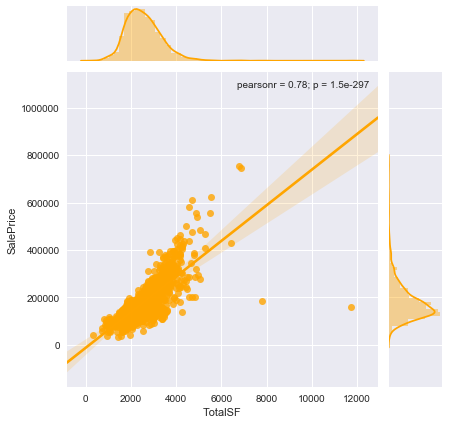

In [75]:
sns.jointplot(x=df6.TotalSF, y=df6.SalePrice, kind='reg', color='orange',size=6)
plt.savefig('jointplot')

In [76]:
# 'TotalBsmtSF'= 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'
df6[['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].head(3)

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,856,706,0,150
1,1262,978,0,284
2,920,486,0,434


In [77]:
# GrLivArea = 1stFlrSF+2ndFlrSF+LowQualFinSF
df6[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']].head(3)

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF
0,1710,856,854,0
1,1262,1262,0,0
2,1786,920,866,0


In [78]:
df6['Porch']=df6['OpenPorchSF']+df6['EnclosedPorch']+df6['3SsnPorch']+df6['ScreenPorch']

In [79]:
df7=df6.drop(['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GarageCars', 'GarageCond', 'TotalBsmtSF', 'BsmtCond', 'FireplaceQu', 'MSSubClass_190','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','OpenPorchSF','EnclosedPorch','3SsnPorch'], axis=1)

In [82]:
df7.shape # we have 155 features 

(1459, 155)

# Standardize Features

In [83]:
from sklearn.preprocessing import StandardScaler 
data=StandardScaler().fit_transform(df7)

In [84]:
index=df7.columns.get_loc('SalePrice')
index

51

In [85]:
colnames=[i for i in df7.columns]
coefnames=np.delete(colnames, index)

In [87]:
X=np.delete(data, index, 1)
y=data[:,index]

In [90]:
import statsmodels.api as sm
model_fit=sm.OLS(y, X).fit()
print(model_fit.summary())
print(model_fit.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     62.06
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:25:36   Log-Likelihood:                -567.29
No. Observations:                1459   AIC:                             1425.
Df Residuals:                    1314   BIC:                             2191.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0367      0.015     -2.414      0.0

In [91]:
model_norm_residuals = model_fit.get_influence().resid_studentized_external
model_leverage = model_fit.get_influence().hat_matrix_diag
model_cooks = model_fit.get_influence().cooks_distance[0]

In [92]:
model=pd.DataFrame(np.column_stack([model_leverage, model_norm_residuals, model_cooks]), columns=['leverage', 'residuals','cooks'])
model=model.dropna(axis=0)

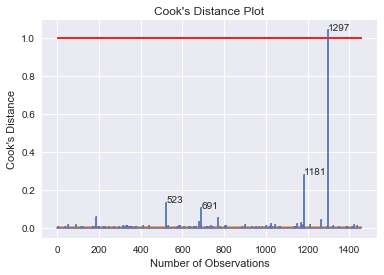

In [93]:
plt.title('Cook\'s Distance Plot')
plt.xlabel('Number of Observations')
plt.ylabel('Cook\'s Distance')
plt.stem(np.arange(len(model.cooks)), model.cooks, markerfmt=",")
leverage_top_4=model.cooks.sort_values(ascending=False)[:4].index
for i in leverage_top_4:
    plt.annotate(i, xy=(i,model.cooks[i]))
plt.hlines(y=4/len(X), xmin=0, xmax=len(X), color='orange')
plt.hlines(y=1, xmin=0, xmax=len(X), color='red')
#plt.savefig('ocooks')

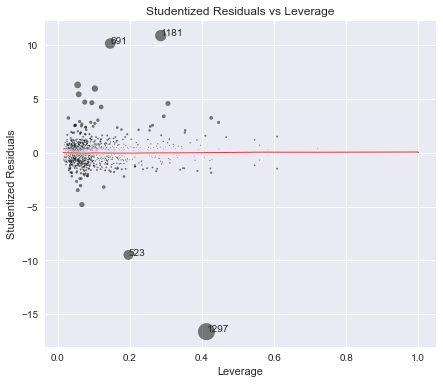

In [94]:
# Studentized Plot and Leverage 
plot_lm_4 = plt.figure(4, figsize=(7,6))
#plot_lm_4.set_figheight(8)
#plot_lm_4.set_figwidth(12)
area=model.residuals**2
plt.scatter(model.leverage, model.residuals, s=area, alpha=0.5, color='black')
sns.regplot(model.leverage, model.residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_title('Studentized Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Studentized Residuals')

# annotations for leverage topsbb
for i in leverage_top_4:
    #print(model_leverage(i))
    plot_lm_4.axes[0].annotate(i, xy=(model.leverage[i],model.residuals[i]))
plt.savefig('oresidualplot')

In [95]:
X_del=np.delete(X, leverage_top_4, 0)
y_del=np.delete(y, leverage_top_4, 0)

In [96]:
X_del.shape

(1455, 154)

In [97]:
# Regression after deleting the outliers
import statsmodels.api as sm
model_fit_del=sm.OLS(y_del, X_del).fit()
print(model_fit_del.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     95.28
Date:                Thu, 17 May 2018   Prob (F-statistic):               0.00
Time:                        20:29:43   Log-Likelihood:                -233.69
No. Observations:                1455   AIC:                             757.4
Df Residuals:                    1310   BIC:                             1523.
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0222      0.012      1.776      0.0

In [98]:
y_del.shape

(1455,)

# Leave One out 

I.Traning size=2p<br>
1.Least Square Regression

In [295]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear(nloop, nsize, ncv):
    # R squared for Train dataset
    rscoretrain=[]
    # R squared for Validation dataset
    rscoretest=[]
    # Mean_squared_error
    mse=[]
    # coefficients 
    coef=[]
    for i in range(nloop):
        X_train, X_test, y_train, y_test=train_test_split(X_del, y_del, train_size=nsize)
        kf=KFold(n_splits=ncv)
        rscore_train=[]
        rscore_test=[]
        mse=[]
        coef=[]
        for hold_index, out_index in kf.split(X_train):
            X_hold, X_out=X_train[hold_index], X_test[out_index]
            y_hold, y_out=y_train[hold_index], y_test[out_index]
            linear=LinearRegression()
            linear.fit(X_hold, y_hold)
            y_pred_train=linear.predict(X_train)
            y_pred_test=linear.predict(X_test)
            score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
            score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
            mse_linear=mean_squared_error(y_test, y_pred_test)
        # Append the values to lists
            rscore_train.append(score_train)
            rscore_test.append(score_test)
            mse.append(mse_linear)
            coef.append(linear.coef_)
        rscoretrain.append(rscore_train[np.argmin(mse)])
        rscoretest.append(rscore_test[np.argmin(mse)])
        mse.append(np.min(mse))
        coef.append(coef[np.argmin(mse)])
    return (rscoretrain, rscoretest, mse, coef)

In [357]:
rscore_train_lscv_o_2p, rscore_test_lscv_o_2p, mse_lscv_o_2p,coef_lscv_o_2p=linear(100, X_del.shape[1]*2, X_del.shape[1]*2)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


     a                     b            c
0  121  Neighborhood_Gilbert -9.99813e+07
1   92     Exterior2nd_Other     -98795.5
2  129  Neighborhood_NridgHt -9.87791e+07
3  132   Neighborhood_Sawyer -9.69408e+07


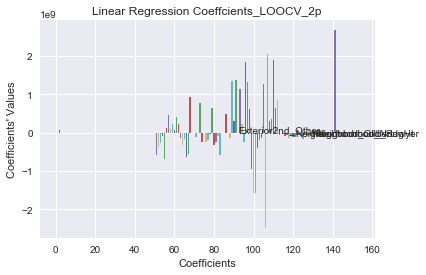

In [358]:
# Coefficients Graph for least Square Regression LOOCV 2p
lscoef_o_2p=coef_lscv_o_2p[np.argmin(mse_lscv_o_2p)]
for i in range(len(coef_lscv_o_2p[np.argmin(mse_lscv_o_2p)])):
    #print(coef_lscv_o_2p[np.argmin(mse_lscv_o_2p)][0][i])
    plt.bar(i, coef_lscv_o_2p[np.argmin(mse_lscv_o_2p)][i])
plt.title('Linear Regression Coeffcients_LOOCV_2p')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
lscoefs=pd.DataFrame(np.column_stack([coefnames, lscoef_o_2p, abs(lscoef_o_2p)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lscoefs.index], lscoefs.name, [float(i) for i in lscoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)
#plt.savefig('flsloocv2p_coef')

2.Ridge regression

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

def ridge(nloop, nsize, ncv,af):
    rscore_train=[]
    rscore_test=[]
    mse=[]
    lam=[]
    coef=[]
    mse_path=[]
    lams=[]
    for i in range(nloop):
        X_train, X_test, y_train, y_test=train_test_split(X_del, y_del, train_size=nsize)
        ridgecv=ElasticNetCV(cv=ncv, l1_ratio=0.01, alphas=af)
        ridgecv.fit(X_train, y_train)
        y_pred_train=ridgecv.predict(X_train)
        y_pred_test=ridgecv.predict(X_test)
        score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
        score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
        mse_ridgecv=mean_squared_error(y_test, y_pred_test)
        # Append the values to lists
        rscore_train.append(score_train)
        rscore_test.append(score_test)
        mse.append(mse_ridgecv)
        lam.append(ridgecv.alpha_)
        coef.append(ridgecv.coef_)
        mse_path.append(ridgecv.mse_path_)
        lams.append(ridgecv.alphas_)
    return (rscore_train, rscore_test, mse, lam, coef, mse_path, lams)

In [165]:
# R squared for learning dataset
rscore_train_ridge_o_2p, rscore_test_ridge_o_2p,mse_rcv_o_2p,\
lam_ridgecv_o_2p,coef_ridgecv_o_2p,mse_path_rcv_o_2p,lams_ridgecv_o_2p=ridge(100,X_del.shape[1]*2,X_del.shape[1]*2, af=None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

     a                     b            c
0  132   Neighborhood_Sawyer -7.41259e-05
1  152               TotalSF     0.186834
2    9           OverallQual     0.127754
3  135  Neighborhood_StoneBr    0.0847501


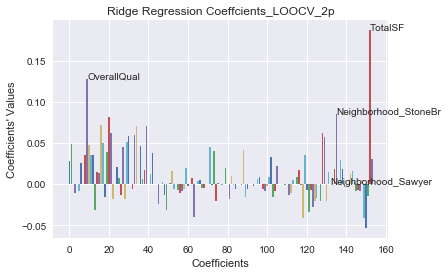

In [166]:
# Coefficients Graph Ridge Regression LOOCV 2p
ridgecoef_o=coef_ridgecv_o_2p[np.argmin(mse_rcv_o_2p)]
for i in range(len(ridgecoef_o.ravel())):
    plt.bar(i, ridgecoef_o.ravel()[i])
plt.title('Ridge Regression Coeffcients_LOOCV_2p')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
ridgecoefs=pd.DataFrame(np.column_stack([coefnames, ridgecoef_o, abs(ridgecoef_o)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in ridgecoefs.index], ridgecoefs.name, [float(i) for i in ridgecoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)
#plt.savefig('fridgeloocv2p_coef')

Selected Lambda: 0.2732631738485146
Lowest CV Error: 0.11819083706645035


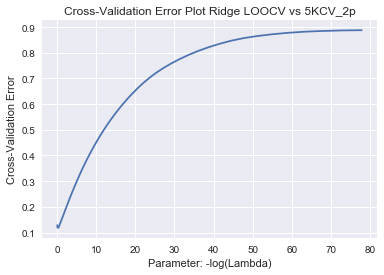

In [124]:
#Cross validation Plot
mean_mse_path_rcv_o_2p=[np.mean(i) for i in mse_path_rcv_o_2p[0]]
plt.plot(lams_ridgecv_o_2p[0], mean_mse_path_rcv_o_2p)
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: -log(Lambda)')
plt.ylabel('Cross-Validation Error')
print('Selected Lambda:',lams_ridgecv_o_2p[0][np.argmin(mean_mse_path_rcv_o_2p)])
print('Lowest CV Error:',np.min(mean_mse_path_rcv_o_2p))

In [123]:
# in order to generate better graph, I set the range of range to be within [0,1]
import random
randoms=[]
for i in range(100):
    randoms.append(random.random())

In [125]:
# I range the ridge regression once again using the more specific range 
# I didn't choose to run 100 loops on this small range as the lambda value is so small that 
# it is computationally too challenging
rscore_train_ridge_o_2pd, rscore_test_ridge_o_2pd,mse_rcv_o_2pd,\
lam_ridgecv_o_2pd,coef_ridgecv_o_2pd,mse_path_rcv_o_2pd,lams_ridgecv_o_2pd=ridge(1,X_del.shape[1]*2,X_del.shape[1]*2, af=randoms)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Selected Lambda: 0.18169919390205902
Lowest CV Error: 0.12446070743679397


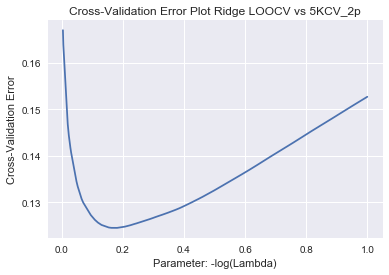

In [126]:
#Adjusted Plot:
#Cross validation Plot
mean_mse_path_rcv_o_2pd=[np.mean(i) for i in mse_path_rcv_o_2pd[0]]
plt.plot(lams_ridgecv_o_2pd[0], mean_mse_path_rcv_o_2pd)
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: -log(Lambda)')
plt.ylabel('Cross-Validation Error')
print('Selected Lambda:',lams_ridgecv_o_2pd[0][np.argmin(mean_mse_path_rcv_o_2pd)])
print('Lowest CV Error:',np.min(mean_mse_path_rcv_o_2pd))

3.Lasso Regression LOOCV 2p

In [314]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

def lasso(nloop, nsize, ncv, af):
    rscore_train=[]
    rscore_test=[]
    mse=[]
    lam=[]
    coef=[]
    mse_path=[]
    lams=[]
    for i in range(nloop):
        X_train, X_test, y_train, y_test=train_test_split(X_del, y_del, train_size=nsize)
        lassocv=LassoCV(cv=ncv, alphas=af)
        lassocv.fit(X_train, y_train)
        y_pred_train=lassocv.predict(X_train)
        y_pred_test=lassocv.predict(X_test)
        score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
        score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
        mse_lassocv=mean_squared_error(y_test, y_pred_test)
        # Append the values to lists
        rscore_train.append(score_train)
        rscore_test.append(score_test)
        mse.append(mse_lassocv)
        lam.append(lassocv.alpha_)
        coef.append(lassocv.coef_)
        mse_path.append(lassocv.mse_path_)
        lams.append(lassocv.alphas_)
    return (rscore_train, rscore_test, mse, mse_path, lam, lams, coef)

In [315]:
#Lasso Regression LOOCV 2p
# R squared for learning dataset
rscore_train_lasso_o_2p,rscore_test_lasso_o_2p,mse_lcv_o_2p,\
mse_path_lcv_o_2p,lam_lassocv_o_2p,lams_lassocv_o_2p,coef_lassocv_o_2p=lasso(100, X_del.shape[1]*2, X_del.shape[1]*2, None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

     a                     b          c
0  152               TotalSF   0.410453
1    9           OverallQual   0.139291
2  129  Neighborhood_NridgHt  0.0938739
3   11             YearBuilt  0.0745567


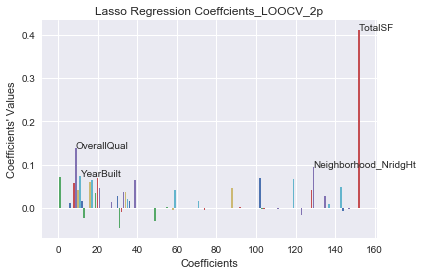

In [168]:
lassocoef_o_2p=coef_lassocv_o_2p[np.argmin(mse_lcv_o_2p)]
for i in range(len(lassocoef_o_2p.ravel())):
    plt.bar(i, lassocoef_o_2p.ravel()[i])
plt.title('Lasso Regression Coeffcients_LOOCV_2p')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
lassocoefs=pd.DataFrame(np.column_stack([coefnames, lassocoef_o_2p, abs(lassocoef_o_2p)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lassocoefs.index], lassocoefs.name, [float(i) for i in lassocoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
plt.savefig('flassoloocv2p_coef')
print(final)

0.021586325669482306
CV Error: 0.15451628700530345


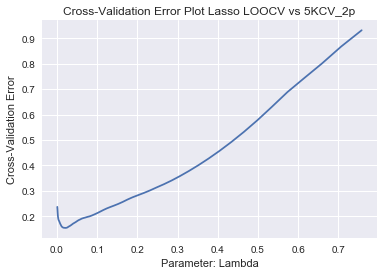

In [169]:
#Cross validation Plot
mean_mse_path_lcv_o_2p=[np.mean(i) for i in mse_path_lcv_o_2p[0]]
plt.plot(lams_lassocv_o_2p[0], mean_mse_path_lcv_o_2p)
plt.title('Cross-Validation Error Plot Lasso LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print(lams_lassocv_o_2p[0][np.argmin(mean_mse_path_lcv_o_2p)])
print('CV Error:',np.min(mean_mse_path_lcv_o_2p))

In [136]:
rd=[]
for i in lams_lassocv_o_2p[0]:
    if i < 0.1:
        rd.append(i)

In [138]:
import random
randomlasso=rd
for i in range(100-len(rd)):
    randomlasso.append(random.random()/100000000000000000)

In [142]:
#Lasso Regression LOOCV 2p
rscore_train_lasso_o_2pd,rscore_test_lasso_o_2pd,mse_lcv_o_2pd,\
mse_path_lcv_o_2pd,lam_lassocv_o_2pd,lams_lassocv_o_2pd,coef_lassocv_o_2pd=lasso(1, X_del.shape[1]*2, X_del.shape[1]*2, randomlasso)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.010515906775920979
CV Error: 0.1356911958542596


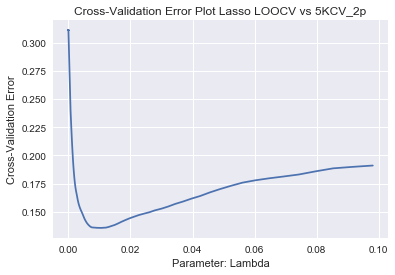

In [143]:
#Cross validation Plot
mean_mse_path_lcv_o_2pd=[np.mean(i) for i in mse_path_lcv_o_2pd[0]]
plt.plot(lams_lassocv_o_2pd[0], mean_mse_path_lcv_o_2pd)
plt.title('Cross-Validation Error Plot Lasso LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print(lams_lassocv_o_2pd[0][np.argmin(mean_mse_path_lcv_o_2pd)])
print('CV Error:',np.min(mean_mse_path_lcv_o_2pd))

4.ElasticNet

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

def elastic(nloop, nsize, ncv, af):
    rscore_train=[]
    rscore_test=[]
    mse=[]
    mse_path=[]
    lam=[]
    lams=[]
    coef=[]    
    for i in range(nloop):
        X_train, X_test, y_train, y_test=train_test_split(X_del, y_del, train_size=nsize)
        elacv=ElasticNetCV(cv=ncv, l1_ratio=0.5, alphas=af)
        elacv.fit(X_train, y_train)
        y_pred_train=elacv.predict(X_train)
        y_pred_test=elacv.predict(X_test)
        score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
        score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
        mse_elacv=mean_squared_error(y_test, y_pred_test)
        # Append the values to lists
        rscore_train.append(score_train)
        rscore_test.append(score_test)
        mse.append(mse_elacv)
        lam.append(elacv.alpha_)
        coef.append(elacv.coef_)
        mse_path.append(elacv.mse_path_)
        lams.append(elacv.alphas_)
    return (rscore_train, rscore_test, mse, lam, coef, mse_path, lams)

In [170]:
rscore_train_ela_o_2p,rscore_test_ela_o_2p,mse_ecv_o_2p,lam_elacv_o_2p,\
coef_elacv_o_2p,mse_path_ecv_o_2p,lams_elacv_o_2p=elastic(100,X_del.shape[1]*2,X_del.shape[1]*2,None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

     a             b         c
0  152       TotalSF  0.407809
1    9   OverallQual  0.135362
2   34  TotRmsAbvGrd  0.129577
3   31  BedroomAbvGr -0.104294


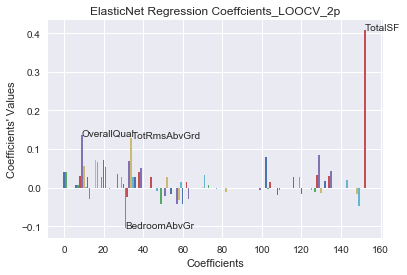

In [171]:
# Coefficients Graph ElasticNet Regression LOOCV 2p
elacoef_o_2p=coef_elacv_o_2p[np.argmin(mse_ecv_o_2p)]
for i in range(len(elacoef_o_2p.ravel())):
    plt.bar(i, elacoef_o_2p.ravel()[i])
plt.title('ElasticNet Regression Coeffcients_LOOCV_2p')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
elacoefs=pd.DataFrame(np.column_stack([coefnames, elacoef_o_2p, abs(elacoef_o_2p)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in elacoefs.index], elacoefs.name, [float(i) for i in elacoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)
plt.savefig('felasticloocv2p_coef')

0.009536670278154165
0.11057337977981126


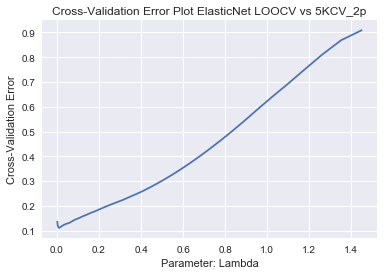

In [172]:
#Cross validation Plot
mean_mse_path_ecv_o_2p=[np.mean(i) for i in mse_path_ecv_o_2p[0]]
plt.plot(lams_elacv_o_2p[0], mean_mse_path_ecv_o_2p)
plt.title('Cross-Validation Error Plot ElasticNet LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print(lams_elacv_o_2p[0][np.argmin(mean_mse_path_ecv_o_2p)])
print(np.min(mean_mse_path_ecv_o_2p))

In [154]:
rdela=[]
for i in lams_elacv_o_2p[0]:
    if i < 0.1:
        rdela.append(i)

In [156]:
import random
randomela=rdela
for i in range(100-len(rdela)):
    randomela.append(random.random()/100000000000000000)

In [157]:
rscore_train_ela_o_2pd,rscore_test_ela_o_2pd,mse_ecv_o_2pd,lam_elacv_o_2pd,\
coef_elacv_o_2pd,mse_path_ecv_o_2pd,lams_elacv_o_2pd=elastic(1,X_del.shape[1]*2,X_del.shape[1]*2,randomela)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.027115938454845653
0.1261909109252189


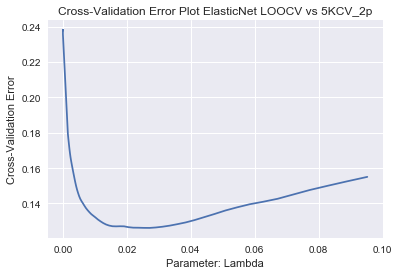

In [158]:
#Cross validation Plot
mean_mse_path_ecv_o_2pd=[np.mean(i) for i in mse_path_ecv_o_2pd[0]]
plt.plot(lams_elacv_o_2pd[0], mean_mse_path_ecv_o_2pd)
plt.title('Cross-Validation Error Plot ElasticNet LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print(lams_elacv_o_2pd[0][np.argmin(mean_mse_path_ecv_o_2pd)])
print(np.min(mean_mse_path_ecv_o_2pd))

II. Training size = n/2

1.Least Square Regression

In [346]:
rscore_train_lscv_o_n2,rscore_test_lscv_o_n2,mse_lscv_o_n2,coef_lscv_o_n2=linear(100, int(X_del.shape[0]/2),int(X_del.shape[0]/2))

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


     a                     b            c
0   54         LotConfig_FR3  9.84576e+06
1  114  Neighborhood_Blueste  -9.5733e+06
2  125    Neighborhood_NAmes -9.34471e+07
3   90   Exterior2nd_ImStucc        90926


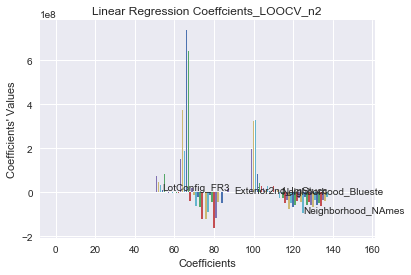

In [347]:
# Coefficients Graph for least Square Regression LOOCV 2p
for i in range(len(coef_lscv_o_n2[np.argmin(mse_lscv_o_n2)])):
    plt.bar(i, coef_lscv_o_n2[np.argmin(mse_lscv_o_n2)][i])
plt.title('Linear Regression Coeffcients_LOOCV_n2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
lscoef_n2=coef_lscv_o_n2[np.argmin(mse_lscv_o_n2)]
lscoefs=pd.DataFrame(np.column_stack([coefnames, lscoef_n2, abs(lscoef_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lscoefs.index], lscoefs.name, [float(i) for i in lscoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)
#plt.savefig('flsloocvn2_coef')

2.Ridge Regression

In [343]:
# R squared for learning dataset
rscore_train_ridge_o_n2, rscore_test_ridge_o_n2,mse_rcv_o_n2,\
lam_ridgecv_o_n2,coef_ridgecv_o_n2,mse_path_rcv_o_n2,lams_ridgecv_o_n2=ridge(100,int(X_del.shape[0]/2),int(X_del.shape[0]/2), af=None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

     a                    b            c
0   68  Exterior1st_AsbShng  -7.3031e-05
1  105    HouseStyle_1.5Fin  1.98728e-05
2    5            LandSlope -1.80449e-06
3  152              TotalSF     0.206956


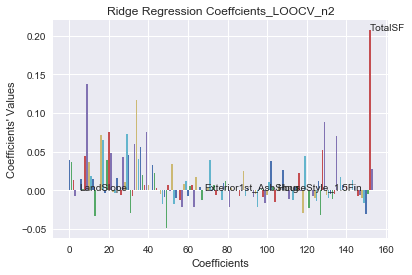

In [344]:
sns.set_style('darkgrid')
# Coefficients Graph Ridge Regression LOOCV 2p
ridgecoef_o=coef_ridgecv_o_n2[np.argmin(mse_rcv_o_n2)]
for i in range(len(ridgecoef_o.ravel())):
    plt.bar(i, ridgecoef_o.ravel()[i])
plt.title('Ridge Regression Coeffcients_LOOCV_n2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
ridgecoefs=pd.DataFrame(np.column_stack([coefnames, ridgecoef_o, abs(ridgecoef_o)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in ridgecoefs.index], ridgecoefs.name, [float(i) for i in ridgecoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)


0.0820083178318505


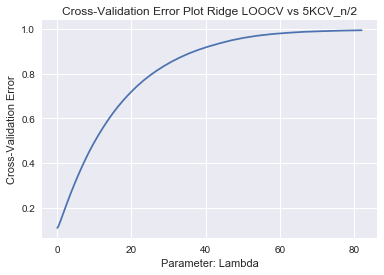

In [345]:
#Cross validation Plot
mean_mse_path_lcv_o_n2=[np.mean(i) for i in mse_path_rcv_o_n2[0]]
plt.plot(lams_ridgecv_o_n2[0], mean_mse_path_lcv_o_n2)
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print(lams_ridgecv_o_n2[0][np.argmin(mean_mse_path_lcv_o_n2)])

In [364]:
rd=[]
for i in lams_ridgecv_o_2p[0]:
    if i < 0.3:
        rd.append(i)

In [365]:
import random
randoms=rd
for i in range(100-len(rd)):
    randoms.append(random.random()/100000000000000000)

In [179]:
# R squared for learning dataset
rscore_train_ridge_o_n2d, rscore_test_ridge_o_n2d,mse_rcv_o_n2d,\
lam_ridgecv_o_n2d,coef_ridgecv_o_n2d,mse_path_rcv_o_n2d,lams_ridgecv_o_n2d=ridge(1,int(X_del.shape[0]/2),int(X_del.shape[0]/2), af=randoms)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.1370428581271539


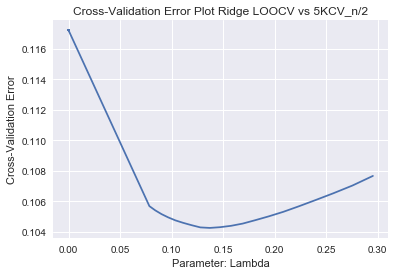

In [182]:
#Cross validation Plot
mean_mse_path_lcv_o_n2d=[np.mean(i) for i in mse_path_rcv_o_n2d[0]]
plt.plot(lams_ridgecv_o_n2d[0], mean_mse_path_lcv_o_n2d)
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print(lams_ridgecv_o_n2d[0][np.argmin(mean_mse_path_lcv_o_n2d)])

3.Lasso Regresion

In [340]:
#Lasso Regression LOOCV 2p
# R squared for learning dataset
rscore_train_lasso_o_n2,rscore_test_lasso_o_n2,mse_lcv_o_n2,\
mse_path_lcv_o_n2,lam_lassocv_o_n2,lams_lassocv_o_n2,coef_lassocv_o_n2=lasso(100, int(X_del.shape[0]/2), int(X_del.shape[0]/2), None)


C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

     a                     b          c
0  152               TotalSF   0.349473
1    9           OverallQual   0.212351
2  129  Neighborhood_NridgHt  0.0843624
3   34          TotRmsAbvGrd  0.0743744


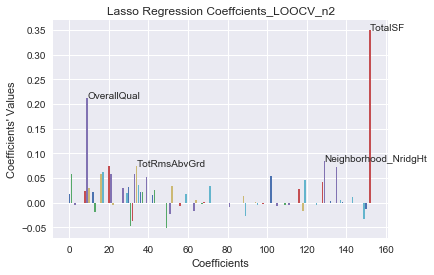

In [341]:
lassocoef_o_n2=coef_lassocv_o_n2[np.argmin(mse_lcv_o_n2)]
for i in range(len(lassocoef_o_n2.ravel())):
    plt.bar(i, lassocoef_o_n2.ravel()[i])
plt.title('Lasso Regression Coeffcients_LOOCV_n2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
lassocoefs_n2=pd.DataFrame(np.column_stack([coefnames, lassocoef_o_n2, abs(lassocoef_o_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lassocoefs_n2.index], lassocoefs_n2.name, [float(i) for i in lassocoefs_n2.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)

0.006067108097851298


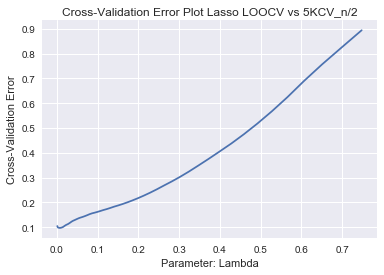

In [342]:
#Cross validation Plot
mean_mse_path_lcv_o_n2=[np.mean(i) for i in mse_path_lcv_o_n2[0]]
plt.plot(lams_lassocv_o_n2[0], mean_mse_path_lcv_o_n2)
plt.title('Cross-Validation Error Plot Lasso LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print(lams_lassocv_o_n2[0][np.argmin(mean_mse_path_lcv_o_n2)])

In [189]:
rd=[]
for i in lams_lassocv_o_n2[0]:
    if i < 0.1:
        rd.append(i)

In [190]:
import random
randomlasso=rd
for i in range(100-len(rd)):
    randomlasso.append(random.random()/100000000000000000)

In [191]:
#Lasso Regression LOOCV 2p
# R squared for learning dataset
rscore_train_lasso_o_n2d,rscore_test_lasso_o_n2d,mse_lcv_o_n2d,\
mse_path_lcv_o_n2d,lam_lassocv_o_n2d,lams_lassocv_o_n2d,coef_lassocv_o_n2d=lasso(1, int(X_del.shape[0]/2), int(X_del.shape[0]/2), af=randomlasso)


C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.008032516059732524


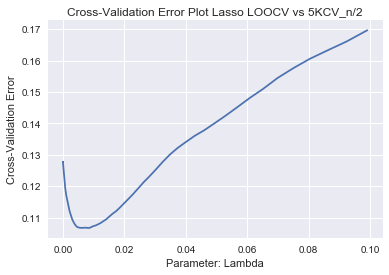

In [192]:
#Cross validation Plot
mean_mse_path_lcv_o_n2d=[np.mean(i) for i in mse_path_lcv_o_n2d[0]]
plt.plot(lams_lassocv_o_n2d[0], mean_mse_path_lcv_o_n2d)
plt.title('Cross-Validation Error Plot Lasso LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print(lams_lassocv_o_n2d[0][np.argmin(mean_mse_path_lcv_o_n2d)])

4.ElasticNet Regression

In [337]:
rscore_train_ela_o_n2,rscore_test_ela_o_n2,mse_ecv_o_n2,lam_elacv_o_n2,\
coef_elacv_o_n2,mse_path_ecv_o_n2,lams_elacv_o_n2=elastic(100,int(X_del.shape[0]/2),int(X_del.shape[0]/2),None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

     a                   b            c
0   87  Exterior2nd_CBlock  6.54382e-05
1  152             TotalSF     0.339163
2    1             LotArea     0.208015
3    9         OverallQual     0.126535


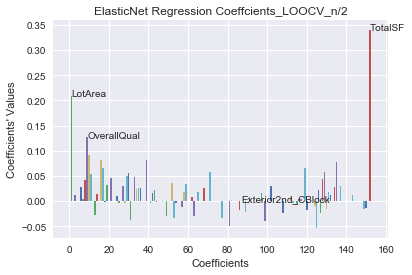

In [338]:
# Coefficients Graph ElasticNet Regression LOOCV 2p
elacoef_o_n2=coef_elacv_o_2p[np.argmin(mse_ecv_o_n2)]
for i in range(len(elacoef_o_n2.ravel())):
    plt.bar(i, elacoef_o_n2.ravel()[i])
plt.title('ElasticNet Regression Coeffcients_LOOCV_n/2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
elacoefs_n2=pd.DataFrame(np.column_stack([coefnames, elacoef_o_n2, abs(elacoef_o_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in elacoefs_n2.index], elacoefs_n2.name, [float(i) for i in elacoefs_n2.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)


LOOCV Lambda: 0.019661703667853445
LOOCV CV Error: 0.11839460413160255


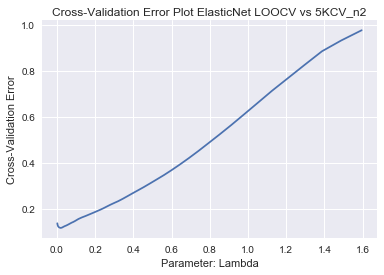

In [339]:
#Cross validation Plot
mean_mse_path_ecv_o_n2=[np.mean(i) for i in mse_path_ecv_o_n2[0]]
plt.plot(lams_elacv_o_n2[0], mean_mse_path_ecv_o_n2)
plt.title('Cross-Validation Error Plot ElasticNet LOOCV vs 5KCV_n2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('LOOCV Lambda:',lams_elacv_o_n2[0][np.argmin(mean_mse_path_ecv_o_n2)])
print('LOOCV CV Error:',min(mean_mse_path_ecv_o_n2))

In [199]:
rdela=[]
for i in lams_elacv_o_2p[0]:
    if i < 0.1:
        rdela.append(i)

In [200]:
import random
randomela=rdela
for i in range(100-len(rdela)):
    randomela.append(random.random()/100000000000000000)

In [201]:
rscore_train_ela_o_n2d,rscore_test_ela_o_n2d,mse_ecv_o_n2d,lam_elacv_o_n2d,\
coef_elacv_o_n2d,mse_path_ecv_o_n2d,lams_elacv_o_n2d=elastic(1,int(X_del.shape[0]/2),int(X_del.shape[0]/2),randomela)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LOOCV Lambda: 0.013517983719635513
LOOCV CV Error: 0.10982581112914032


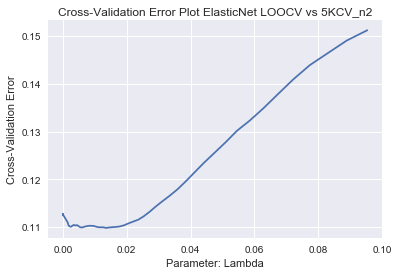

In [203]:
#Cross validation Plot
mean_mse_path_ecv_o_n2d=[np.mean(i) for i in mse_path_ecv_o_n2d[0]]
plt.plot(lams_elacv_o_n2d[0], mean_mse_path_ecv_o_n2d)
plt.title('Cross-Validation Error Plot ElasticNet LOOCV vs 5KCV_n2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('LOOCV Lambda:',lams_elacv_o_n2d[0][np.argmin(mean_mse_path_ecv_o_n2d)])
print('LOOCV CV Error:',min(mean_mse_path_ecv_o_n2d))

Box Plot of R Squared for LOOCV

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


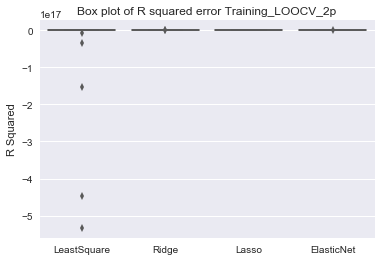

In [368]:
# Boxplot of training R squared error with 2p
a=pd.DataFrame(np.column_stack([rscore_train_lscv_o_2p, rscore_train_ridge_o_2p, rscore_train_lasso_o_2p, rscore_train_ela_o_2p]), columns=['LeastSquare', 'Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=a, orient='v', palette='Set2')
plt.title('Box plot of R squared error Training_LOOCV_2p')
plt.ylabel('R Squared')
plt.savefig('ftrainloocv2p_box')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

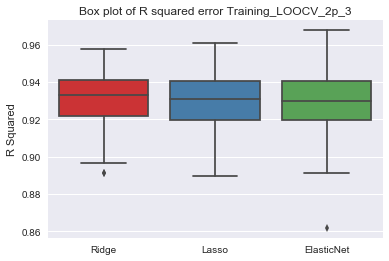

In [369]:
# Boxplot of training R squared error with 2p
z=pd.DataFrame(np.column_stack([rscore_train_ridge_o_2p, rscore_train_lasso_o_2p, rscore_train_ela_o_2p]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=z, orient='v', palette='Set1')
plt.title('Box plot of R squared error Training_LOOCV_2p_3')
plt.ylabel('R Squared')
#plt.savefig('ftrainloocv2p_box')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


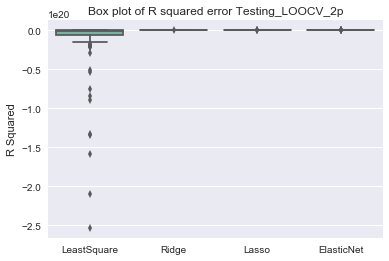

In [360]:
# Boxplot of testing R squared error with LOOCV_2p
b=pd.DataFrame(np.column_stack([rscore_test_lscv_o_2p, rscore_test_ridge_o_2p, rscore_test_lasso_o_2p, rscore_test_ela_o_2p]), columns=['LeastSquare', 'Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=b, orient='v', palette='Set2')
plt.title('Box plot of R squared error Testing_LOOCV_2p')
plt.ylabel('R Squared')
#plt.savefig('ftestloocv2p_box')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

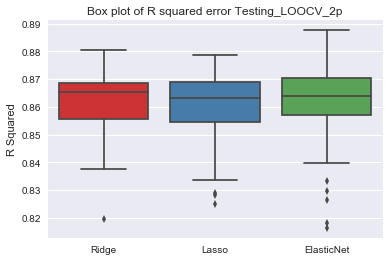

In [370]:
# Boxplot of testing R squared error with LOOCV_2p
w=pd.DataFrame(np.column_stack([rscore_test_ridge_o_2p, rscore_test_lasso_o_2p, rscore_test_ela_o_2p]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=w, orient='v', palette='Set1')
plt.title('Box plot of R squared error Testing_LOOCV_2p')
plt.ylabel('R Squared')
#plt.savefig('ftestloocv2p_box')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


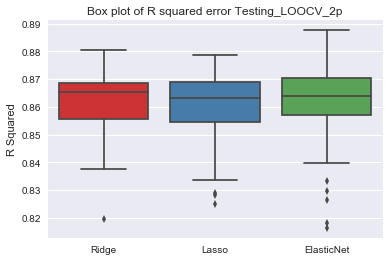

In [361]:
c=pd.DataFrame(np.column_stack([rscore_test_ridge_o_2p, rscore_test_lasso_o_2p, rscore_test_ela_o_2p]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=c, orient='v', palette='Set1')
plt.title('Box plot of R squared error Testing_LOOCV_2p')
plt.ylabel('R Squared')
plt.savefig('ftestloocv2p_box')

Boxplot of R squared error with LOOCV_n/2

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

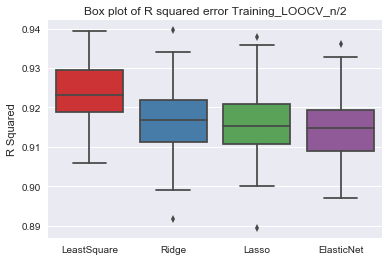

In [371]:
# Boxplot of training R squared error with n/2
e=pd.DataFrame(np.column_stack([rscore_train_lscv_o_n2, rscore_train_ridge_o_n2, rscore_train_lasso_o_n2, rscore_train_ela_o_n2]), columns=['LeastSquare', 'Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=e, orient='v', palette='Set1')
plt.title('Box plot of R squared error Training_LOOCV_n/2')
plt.ylabel('R Squared')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

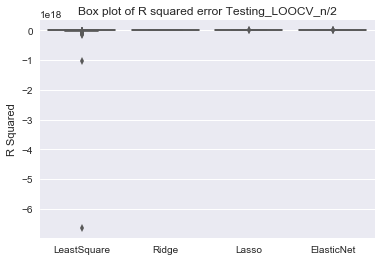

In [372]:
# Boxplot of testing R squared error with LOOCV_n/2
f=pd.DataFrame(np.column_stack([rscore_test_lscv_o_n2, rscore_test_ridge_o_n2, rscore_test_lasso_o_n2, rscore_test_ela_o_n2]), columns=['LeastSquare', 'Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=f, orient='v', palette='Set2')
plt.title('Box plot of R squared error Testing_LOOCV_n/2')
plt.ylabel('R Squared')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

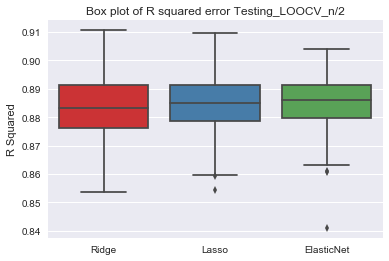

In [373]:
c=pd.DataFrame(np.column_stack([rscore_test_ridge_o_n2, rscore_test_lasso_o_n2, rscore_test_ela_o_n2]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=c, orient='v', palette='Set1')
plt.title('Box plot of R squared error Testing_LOOCV_n/2')
plt.ylabel('R Squared')

# 5 Fold CV

I.Training size = 2p

1.Least Square Regression

In [326]:
rscore_train_lscv_2p, rscore_test_lscv_2p, mse_lscv_2p,coef_lscv_2p=linear(100, X_del.shape[1]*2, 5)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


     a                     b            c
0   63      MSZoning_C (all)  9.64319e+09
1  107     HouseStyle_1Story  9.21098e+10
2  146         MSSubClass_80 -9.14412e+10
3  114  Neighborhood_Blueste  8.91815e+09


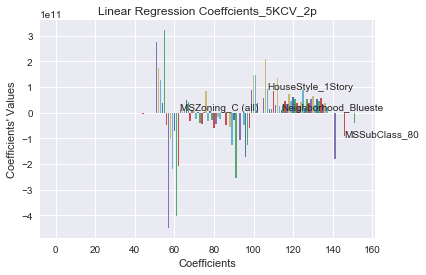

In [327]:
# Coefficients Graph for least Square Regression 5KCV 2p
for i in range(len(coef_lscv_2p[np.argmin(mse_lscv_2p)])):
    plt.bar(i, coef_lscv_2p[np.argmin(mse_lscv_2p)][i])
plt.title('Linear Regression Coeffcients_5KCV_2p')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
lscoef_2p=coef_lscv_2p[np.argmin(mse_lscv_2p)]
lscoefs=pd.DataFrame(np.column_stack([coefnames, lscoef_2p, abs(lscoef_2p)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lscoefs.index], lscoefs.name, [float(i) for i in lscoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print (final)
plt.savefig('fls5kcv2p_coef')

2.Ridge Regression

In [328]:
rscore_train_ridge_2p,rscore_test_ridge_2p,mse_rcv_2p,lam_ridgecv_o_2p,\
coef_ridgecv_2p,mse_path_rcv_2p,lams_ridgecv_2p=elastic(100,X_del.shape[1]*2,5,None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

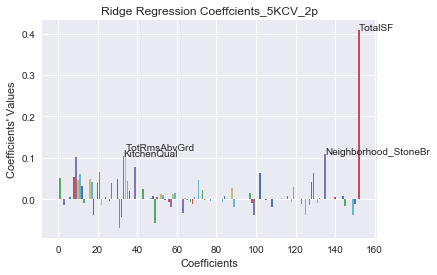

In [329]:
# Coefficients Graph Ridge Regression 5kCV 2p
ridgecoef_2p=coef_ridgecv_2p[np.argmin(mse_rcv_2p)]
for i in range(len(ridgecoef_2p.ravel())):
    plt.bar(i, ridgecoef_2p.ravel()[i])
plt.title('Ridge Regression Coeffcients_5KCV_2p')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
ridgecoefs=pd.DataFrame(np.column_stack([coefnames, ridgecoef_2p, abs(ridgecoef_2p)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in ridgecoefs.index], ridgecoefs.name, [float(i) for i in ridgecoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
#plt.savefig('fridge5kcv2p_coef')

Selected Lambda: 0.20829295890700777
Lowest CV Error: 0.12991623790687507


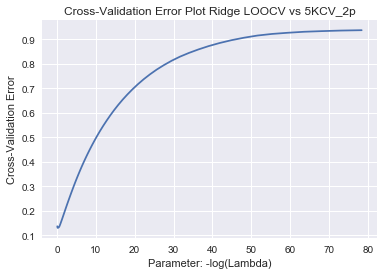

In [221]:
#Cross validation Plot
mean_mse_path_rcv_o_2p=[np.mean(i) for i in mse_path_rcv_o_2p[0]]
plt.plot(lams_ridgecv_o_2p[0], mean_mse_path_rcv_o_2p)
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: -log(Lambda)')
plt.ylabel('Cross-Validation Error')
print('Selected Lambda:',lams_ridgecv_o_2p[0][np.argmin(mean_mse_path_rcv_o_2p)])
print('Lowest CV Error:',np.min(mean_mse_path_rcv_o_2p))

In [222]:
# in order to generate better graph, I set the range of range to be within [0,1]
import random
randoms=[]
for i in range(100):
    randoms.append(random.random())

In [224]:
rscore_train_ridge_2pd,rscore_test_ridge_2pd,mse_rcv_2pd,lam_ridgecv_o_2pd,\
coef_ridgecv_2pd,mse_path_rcv_2pd,lams_ridgecv_2pd=elastic(1,X_del.shape[1]*2,5,randoms)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


5KCV Lambda:0.033861
5KCV CV Error:0.133591
LOOCV Lambda:0.181699
LOOCV CV Error:0.124461


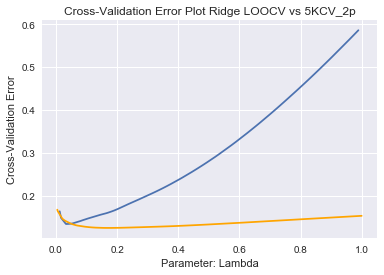

In [380]:
#Cross validation Plot
mean_mse_path_rcv_2pd=[np.mean(i) for i in mse_path_rcv_2pd[0]]
plt.plot(lams_ridgecv_2pd[0], mean_mse_path_rcv_2pd)
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('5KCV Lambda:%f'%lams_ridgecv_2pd[0][np.argmin(mean_mse_path_rcv_2pd)])
print('5KCV CV Error:%f'% np.min(mean_mse_path_rcv_2pd))

#Cross validation Plot
mean_mse_path_rcv_o_2pd=[np.mean(i) for i in mse_path_rcv_o_2pd[0]]
plt.plot(lams_ridgecv_o_2pd[0], mean_mse_path_rcv_o_2pd, color='orange')
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('LOOCV Lambda:%f'%lams_ridgecv_o_2pd[0][np.argmin(mean_mse_path_rcv_o_2pd)])
print('LOOCV CV Error:%f'%np.min(mean_mse_path_rcv_o_2pd))

#plt.savefig('ridge2pvs')

3.Lasso Regression

In [330]:
rscore_train_lasso_2p,rscore_test_lasso_2p,mse_lcv_2p,\
mse_path_lcv_2p,lam_lassocv_2p,lams_lassocv_2p,coef_lassocv_2p=lasso(100, X_del.shape[1]*2, 5, None)


C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

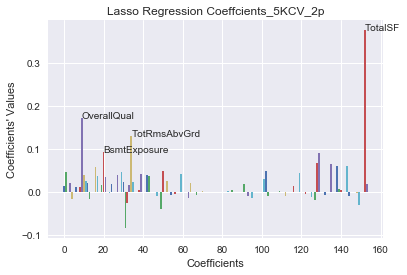

In [331]:
lassocoef_2p=coef_lassocv_2p[np.argmin(mse_lcv_2p)]
for i in range(len(lassocoef_2p.ravel())):
    plt.bar(i, lassocoef_2p.ravel()[i])
plt.title('Lasso Regression Coeffcients_5KCV_2p')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
lassocoefs=pd.DataFrame(np.column_stack([coefnames, lassocoef_2p, abs(lassocoef_2p)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lassocoefs.index], lassocoefs.name, [float(i) for i in lassocoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))

plt.savefig('flasso5kcv2p_coef')

In [230]:
rd=[]
for i in lams_lassocv_2p[0]:
    if i < 0.1:
        rd.append(i)

In [232]:
import random
randomlasso=rd
for i in range(100-len(rd)):
    randomlasso.append(random.random()/100000000000000000)

In [233]:
rscore_train_lasso_2pd,rscore_test_lasso_2pd,mse_lcv_2pd,\
mse_path_lcv_2pd,lam_lassocv_2pd,lams_lassocv_2pd,coef_lassocv_2pd=lasso(1, X_del.shape[1]*2, 5, randomlasso)


C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5KCV Lambda: 0.016496
5KCV CV Error: 0.115495
LOOCV Lambda: 0.010516
LOOCV CV Error: 0.135691


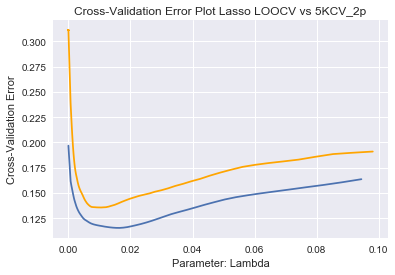

In [234]:
#Cross validation Plot
mean_mse_path_lcv_2pd=[np.mean(i) for i in mse_path_lcv_2pd[0]]
ax1=plt.plot(lams_lassocv_2pd[0], mean_mse_path_lcv_2pd, label='5KCV')
plt.title('Cross-Validation Error Plot Lasso LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('5KCV Lambda: %f'%lams_lassocv_2pd[0][np.argmin(mean_mse_path_lcv_2pd)])
print('5KCV CV Error: %f'% min(mean_mse_path_lcv_2pd))
#Cross validation Plot
mean_mse_path_lcv_o_2pd=[np.mean(i) for i in mse_path_lcv_o_2pd[0]]
ax2=plt.plot(lams_lassocv_o_2pd[0], mean_mse_path_lcv_o_2pd, color='orange', label='LOOCV')
plt.title('Cross-Validation Error Plot Lasso LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('LOOCV Lambda: %f'%lams_lassocv_o_2pd[0][np.argmin(mean_mse_path_lcv_o_2pd)])
print('LOOCV CV Error: %f'%np.min(mean_mse_path_lcv_o_2pd))
#plt.legend([ax1, ax2])
#plt.savefig('lasso2pvs')

4.ElasticNet Regression

In [280]:
rscore_train_ela_2p,rscore_test_ela_2p,mse_ecv_2p,lam_elacv_2p,\
coef_elacv_2p,mse_path_ecv_2p,lams_elacv_2p=elastic(100,X_del.shape[1]*2,5,None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

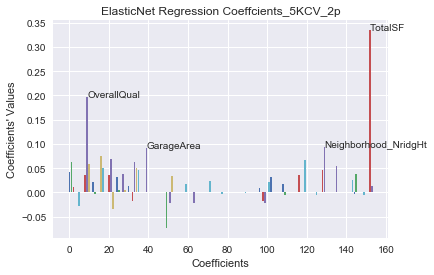

In [281]:
# Coefficients Graph ElasticNet Regression LOOCV 2p
elacoef_2p=coef_elacv_2p[np.argmin(mse_ecv_2p)]
for i in range(len(elacoef_2p.ravel())):
    plt.bar(i, elacoef_2p.ravel()[i])
plt.title('ElasticNet Regression Coeffcients_5KCV_2p')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
elacoefs=pd.DataFrame(np.column_stack([coefnames, elacoef_2p, abs(elacoef_2p)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in elacoefs.index], elacoefs.name, [float(i) for i in elacoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
#plt.savefig('felastic5kcv2p_coef')

In [238]:
rdela=[]
for i in lams_elacv_o_2p[0]:
    if i < 0.1:
        rdela.append(i)

In [239]:
import random
randomela=rdela
for i in range(100-len(rdela)):
    randomela.append(random.random()/100000000000000000)

In [240]:
rscore_train_ela_2pd,rscore_test_ela_2pd,mse_ecv_2pd,lam_elacv_2pd,\
coef_elacv_2pd,mse_path_ecv_2pd,lams_elacv_2pd=elastic(1,X_del.shape[1]*2,5,randomela)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5KCV Lambda: 0.027161
5KCV CV Error: 0.118668
LOOCV Lambda: 0.027116
LOOCV CV Error: 0.126191


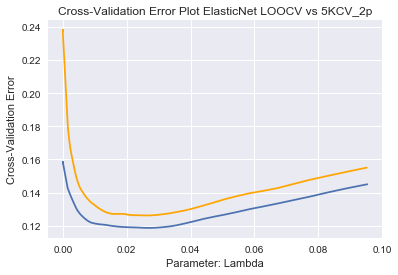

In [241]:
#Cross validation Plot
mean_mse_path_ecv_2pd=[np.mean(i) for i in mse_path_ecv_2pd[0]]
plt.plot(lams_elacv_2pd[0], mean_mse_path_ecv_2pd)
plt.title('Cross-Validation Error Plot ElasticNet LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('5KCV Lambda: %f'%lams_elacv_2pd[0][np.argmin(mean_mse_path_ecv_o_2pd)])
print('5KCV CV Error: %f'%np.min(mean_mse_path_ecv_2pd))

#Cross validation Plot
mean_mse_path_ecv_o_2pd=[np.mean(i) for i in mse_path_ecv_o_2pd[0]]
plt.plot(lams_elacv_o_2pd[0], mean_mse_path_ecv_o_2pd, color='orange')
plt.title('Cross-Validation Error Plot ElasticNet LOOCV vs 5KCV_2p')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('LOOCV Lambda: %f'%lams_elacv_o_2pd[0][np.argmin(mean_mse_path_ecv_o_2pd)])
print('LOOCV CV Error: %f'%np.min(mean_mse_path_ecv_o_2pd))
#plt.savefig('elastic2pvs')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


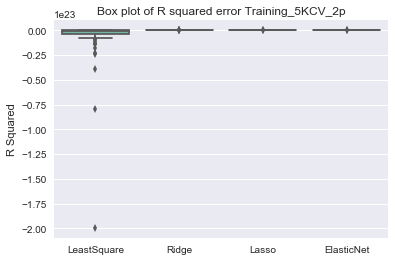

In [333]:
# Boxplot of training R squared error with 2p
h=pd.DataFrame(np.column_stack([rscore_train_lscv_2p, rscore_train_ridge_2p, rscore_train_lasso_2p, rscore_train_ela_2p]), columns=['LeastSquare', 'Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=h, orient='v', palette='Set2')
plt.title('Box plot of R squared error Training_5KCV_2p')
plt.ylabel('R Squared')
plt.savefig('ftrain5kcv2p_box')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


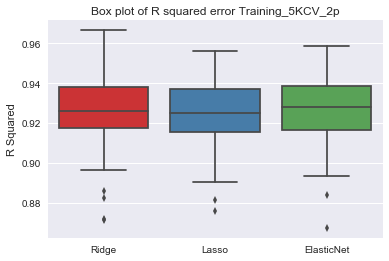

In [334]:
i=pd.DataFrame(np.column_stack([rscore_train_ridge_2p, rscore_train_lasso_2p, rscore_train_ela_2p]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=i, orient='v', palette='Set1')
plt.title('Box plot of R squared error Training_5KCV_2p')
plt.ylabel('R Squared')
plt.savefig('ftrain5kcv2p_box3')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

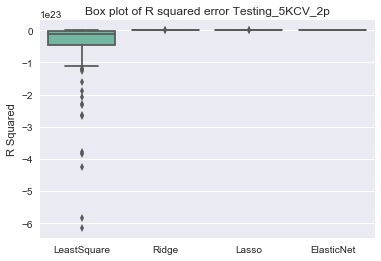

In [376]:
# Boxplot of testing R squared error with LOOCV_2p
j=pd.DataFrame(np.column_stack([rscore_test_lscv_2p, rscore_test_ridge_2p, rscore_test_lasso_2p, rscore_test_ela_2p]), columns=['LeastSquare', 'Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=j, orient='v', palette='Set2')
plt.title('Box plot of R squared error Testing_5KCV_2p')
plt.ylabel('R Squared')
#plt.savefig('ftest5kcv2p_box')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

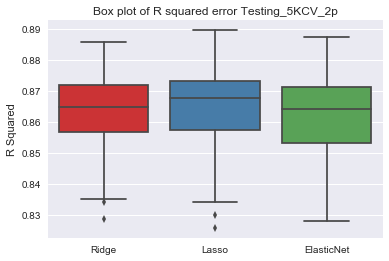

In [377]:
k=pd.DataFrame(np.column_stack([rscore_test_ridge_2p, rscore_test_lasso_2p, rscore_test_ela_2p]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=k, orient='v', palette='Set1')
plt.title('Box plot of R squared error Testing_5KCV_2p')
plt.ylabel('R Squared')
#plt.savefig('ftest5kcv2p_box3')

II.Traning size=n/2

1.Least Square Regression

In [298]:
rscore_train_lscv_n2, rscore_test_lscv_n2, mse_lscv_n2,coef_lscv_n2=linear(100, int(X_del.shape[0]/2), 5)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


     a                     b            c
0   90   Exterior2nd_ImStucc  9.19219e+09
1  112       HouseStyle_SLvl  8.92242e+09
2  137  Neighborhood_Veenker   -8.724e+09
3   57     GarageType_Attchd  8.22097e+10


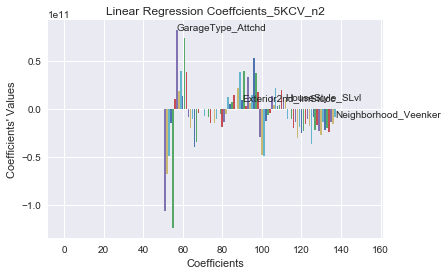

In [383]:
# Coefficients Graph for least Square Regression 5KCV n/2
for i in range(len(coef_lscv_n2[np.argmin(mse_lscv_n2)])):
    plt.bar(i, coef_lscv_n2[np.argmin(mse_lscv_n2)][i])
plt.title('Linear Regression Coeffcients_5KCV_n2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
lscoef_n2=coef_lscv_n2[np.argmin(mse_lscv_n2)]
lscoefs=pd.DataFrame(np.column_stack([coefnames, lscoef_n2, abs(lscoef_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lscoefs.index], lscoefs.name, [float(i) for i in lscoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)
#plt.savefig('fls5kcvn2_coef')

2.Ridge Regression

In [276]:
rscore_train_ridge_n2, rscore_test_ridge_n2,mse_rcv_n2,\
lam_ridgecv_n2,coef_ridgecv_n2,mse_path_rcv_n2,lams_ridgecv_n2=ridge(100,int(X_del.shape[0]/2),5, af=None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

     a                   b            c
0   87  Exterior2nd_CBlock -8.84354e-05
1   72  Exterior1st_CBlock -7.75271e-05
2  152             TotalSF     0.216209
3    9         OverallQual     0.150251


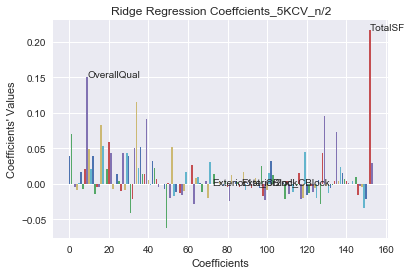

In [386]:
# Coefficients Graph Ridge Regression LOOCV n/2
ridgecoef=coef_ridgecv_n2[np.argmin(mse_rcv_n2)]
for i in range(len(ridgecoef.ravel())):
    plt.bar(i, ridgecoef.ravel()[i])
plt.title('Ridge Regression Coeffcients_5KCV_n/2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
ridgecoefs=pd.DataFrame(np.column_stack([coefnames, ridgecoef, abs(ridgecoef)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in ridgecoefs.index], ridgecoefs.name, [float(i) for i in ridgecoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
print(final)
#plt.savefig('fridge5kcvn2_coef')

In [366]:
rscore_train_ridge_n2d, rscore_test_ridge_n2d,mse_rcv_n2d,\
lam_ridgecv_n2d,coef_ridgecv_n2d,mse_path_rcv_n2d,lams_ridgecv_n2d=ridge(1,int(X_del.shape[0]/2),5, af=randoms)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5KCV Lambda:0.127807
5KCV CV Error:0.105392
LOOCV Lambda:0.045965
LOOCV Error:0.104243


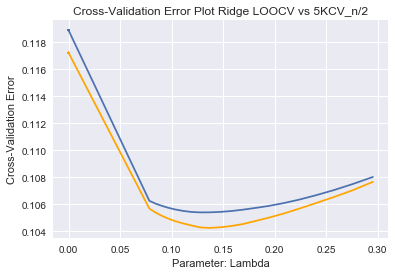

In [381]:
#Cross validation Plot
mean_mse_path_rcv_n2d=[np.mean(i) for i in mse_path_rcv_n2d[0]]
plt.plot(lams_ridgecv_n2d[0], mean_mse_path_rcv_n2d)
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('5KCV Lambda:%f'%lams_ridgecv_n2d[0][np.argmin(mean_mse_path_rcv_n2d)])
print('5KCV CV Error:%f'%np.min(mean_mse_path_rcv_n2d))

#Cross validation Plot
mean_mse_path_rcv_o_n2d=[np.mean(i) for i in mse_path_rcv_o_n2d[0]]
plt.plot(lams_ridgecv_o_n2d[0], mean_mse_path_rcv_o_n2d, color='orange')
plt.title('Cross-Validation Error Plot Ridge LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('LOOCV Lambda:%f'%lams_lassocv_o_n2d[0][np.argmin(mean_mse_path_rcv_o_n2d)])
print('LOOCV Error:%f'%min(mean_mse_path_rcv_o_n2d))

3.Lasso Regression

In [320]:
rscore_train_lasso_n2,rscore_test_lasso_n2,mse_lcv_n2,\
mse_path_lcv_n2,lam_lassocv_n2,lams_lassocv_n2,coef_lassocv_n2=lasso(100, int(X_del.shape[0]/2), 5, None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

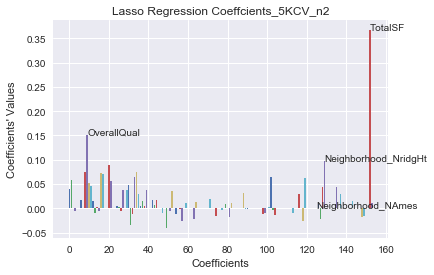

In [384]:
lassocoef_n2=coef_lassocv_n2[np.argmin(mse_lcv_n2)]
for i in range(len(lassocoef_n2.ravel())):
    plt.bar(i, lassocoef_n2.ravel()[i])
plt.title('Lasso Regression Coeffcients_5KCV_n2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
plt.savefig('oLasso5kcvn2_coef')
lassocoefs=pd.DataFrame(np.column_stack([coefnames, lassocoef_n2, abs(lassocoef_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lassocoefs.index], lassocoefs.name, [float(i) for i in lassocoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
#plt.savefig('flasso5kcvn2_coef')

In [261]:
rscore_train_lasso_n2d,rscore_test_lasso_n2d,mse_lcv_n2d,\
mse_path_lcv_n2d,lam_lassocv_n2d,lams_lassocv_n2d,coef_lassocv_n2d=lasso(1, int(X_del.shape[0]/2), 5, randomlasso)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5KCV Lambda: 0.010854
5KCV CV Error: 0.113547
LOOCV Lambda: 0.008033
LOOCV Error: 0.106702


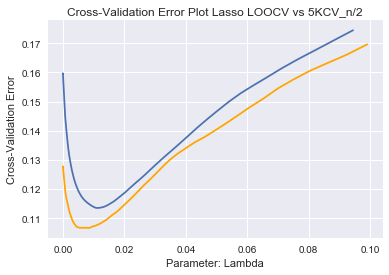

In [382]:
#Cross validation Plot
mean_mse_path_lcv_n2d=[np.mean(i) for i in mse_path_lcv_n2d[0]]
plt.plot(lams_lassocv_n2d[0], mean_mse_path_lcv_n2d)
plt.title('Cross-Validation Error Plot Lasso LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('5KCV Lambda: %f'%lams_lassocv_n2d[0][np.argmin(mean_mse_path_lcv_n2d)])
print('5KCV CV Error: %f'%np.min(mean_mse_path_lcv_n2d))

#Cross validation Plot
mean_mse_path_lcv_o_n2d=[np.mean(i) for i in mse_path_lcv_o_n2d[0]]
plt.plot(lams_lassocv_o_n2d[0], mean_mse_path_lcv_o_n2d, color='orange')
plt.title('Cross-Validation Error Plot Lasso LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('LOOCV Lambda: %f'%lams_lassocv_o_n2d[0][np.argmin(mean_mse_path_lcv_o_n2d)])
print('LOOCV Error: %f'%min(mean_mse_path_lcv_o_n2d))

4.ElasticNet Regression

In [272]:
rscore_train_ela_n2,rscore_test_ela_n2,mse_ecv_n2,lam_elacv_n2,\
coef_elacv_n2,mse_path_ecv_n2,lams_elacv_n2=elastic(100,int(X_del.shape[0]/2),5,None)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

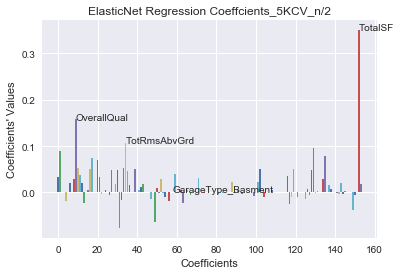

In [385]:
# Coefficients Graph ElasticNet Regression 5KCV n/2
elacoef_n2=coef_elacv_n2[np.argmin(mse_ecv_n2)]
for i in range(len(elacoef_n2.ravel())):
    plt.bar(i, elacoef_n2.ravel()[i])
plt.title('ElasticNet Regression Coeffcients_5KCV_n/2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
plt.savefig('oElastic5kcvn2_coef')
elacoefs=pd.DataFrame(np.column_stack([coefnames, elacoef_n2, abs(elacoef_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in elacoefs.index], elacoefs.name, [float(i) for i in elacoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
#plt.savefig('felastic5kcvn2_coef')

In [266]:
rscore_train_ela_n2d,rscore_test_ela_n2d,mse_ecv_n2d,lam_elacv_n2d,\
coef_elacv_n2d,mse_path_ecv_n2d,lams_elacv_n2d=elastic(1,int(X_del.shape[0]/2),5,randomela)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


5KCV Lambda: 0.022031
5KCV CV Error: 0.111795
LOOCV Lambda: 0.013518
LOOCV CV Error: 0.109826


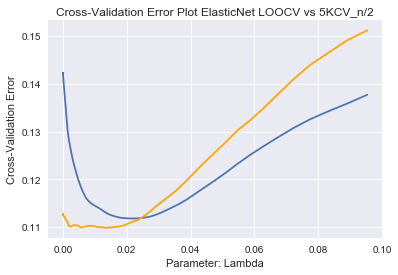

In [268]:
#Cross validation Plot
mean_mse_path_ecv_n2d=[np.mean(i) for i in mse_path_ecv_n2d[0]]
plt.plot(lams_elacv_n2d[0], mean_mse_path_ecv_n2d)
plt.title('Cross-Validation Error Plot ElasticNet LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('5KCV Lambda: %f'%lams_elacv_n2d[0][np.argmin(mean_mse_path_ecv_n2d)])
print('5KCV CV Error: %f'%np.min(mean_mse_path_ecv_n2d))

#Cross validation Plot
mean_mse_path_ecv_o_n2d=[np.mean(i) for i in mse_path_ecv_o_n2d[0]]
plt.plot(lams_elacv_o_n2d[0], mean_mse_path_ecv_o_n2d, color='orange')
plt.title('Cross-Validation Error Plot ElasticNet LOOCV vs 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('LOOCV Lambda: %f'%lams_elacv_o_n2d[0][np.argmin(mean_mse_path_ecv_o_n2d)])
print('LOOCV CV Error: %f'%min(mean_mse_path_ecv_o_n2d))

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

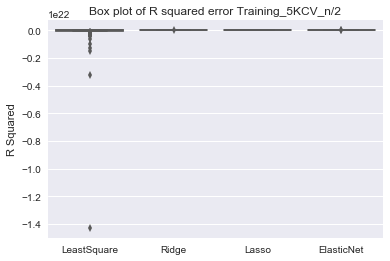

In [374]:
# Boxplot of training R squared error with n/2
l=pd.DataFrame(np.column_stack([rscore_train_lscv_n2, rscore_train_ridge_n2, rscore_train_lasso_n2, rscore_train_ela_n2]), columns=['LeastSquare', 'Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=l, orient='v', palette='Set2')
plt.title('Box plot of R squared error Training_5KCV_n/2')
plt.ylabel('R Squared')
#plt.savefig('ftrain5kcvn2_box')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

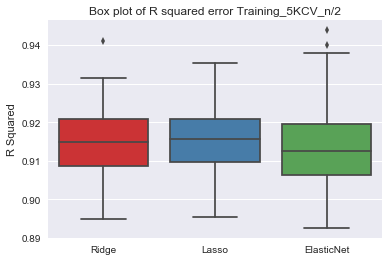

In [375]:
# Boxplot of training R squared error with 2p
m=pd.DataFrame(np.column_stack([rscore_train_ridge_n2, rscore_train_lasso_n2, rscore_train_ela_n2]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=m, orient='v', palette='Set1')
plt.title('Box plot of R squared error Training_5KCV_n/2')
plt.ylabel('R Squared')
#plt.savefig('ftrain5kcvn2_box3')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

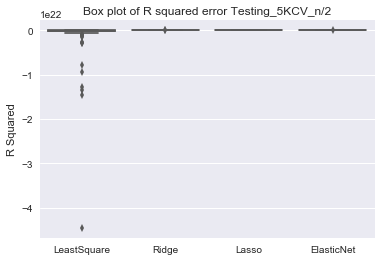

In [378]:
# Boxplot of training R squared error with n/2
n=pd.DataFrame(np.column_stack([rscore_test_lscv_n2, rscore_test_ridge_n2, rscore_test_lasso_n2, rscore_test_ela_n2]), columns=['LeastSquare', 'Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=n, orient='v', palette='Set2')
plt.title('Box plot of R squared error Testing_5KCV_n/2')
plt.ylabel('R Squared')
#plt.savefig('ftest5kcvn2_box')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0,0.5,'R Squared')

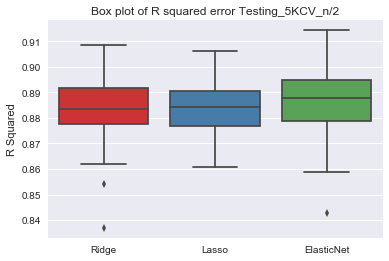

In [379]:
# Boxplot of training R squared error with 2p
m=pd.DataFrame(np.column_stack([rscore_test_ridge_n2, rscore_test_lasso_n2, rscore_test_ela_n2]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=m, orient='v', palette='Set1')
plt.title('Box plot of R squared error Testing_5KCV_n/2')
plt.ylabel('R Squared')
#plt.savefig('ftest5kcvn2_box3')